In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# Final IronHack Project

## This is the main code



### -Dataset Exploration.
### -Dataset Null Treatment.
### -Dataset for Tableau Data visualization.
### -Drop columns with more than 90% null values.
### -Find correlation fo numeric Data.
### -Use KNN Imputer to fill null numeric values
### -Use fillna to fill null non-numeric values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import scipy.cluster.hierarchy as sch

import itertools    
import sklearn

from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from feature_engine.encoding import CountFrequencyEncoder

from yellowbrick.cluster import KElbowVisualizer

from matplotlib.pyplot import figure


%matplotlib inline


In [4]:
pd.set_option("display.max_columns", None)

### Dataset Exploration 

In [5]:
country_level_cb = pd.read_csv('country_level_codebook.csv')
country_level_cb.head(5)

regionID iso3c country_name incomeID  \
0      ECS   LUX   Luxembourg      HIC   
1      ECS   NOR       Norway      HIC   
2      MEA   MLT        Malta      HIC   
3      EAS   NZL  New Zealand      HIC   
4      EAS   JPN        Japan      HIC   

                                  measurement        units    year  \
0  special_waste_agricultural_waste_tons_year  tonnes/year  2014.0   
1  special_waste_agricultural_waste_tons_year  tonnes/year  2014.0   
2  special_waste_agricultural_waste_tons_year  tonnes/year  2014.0   
3  special_waste_agricultural_waste_tons_year  tonnes/year  2014.0   
4  special_waste_agricultural_waste_tons_year  tonnes/year  2010.0   

                                              source  \
0  Eurostat. 2017a. "Generation of waste by waste...   
1  Eurostat. 2017a. "Generation of waste by waste...   
2  Eurostat. 2017a. "Generation of waste by waste...   
3  New Zealand, MFE (Ministry for the Environment...   
4  Modak, Prasad, Agamuthu Pariatamby, Jeffrey Se...   

                                            comments  
0                                            1; 2; 4  
1  1; HW includes waste containing oil, solvents,...  
2                                         1; 2; 3; 4  
3  CandD waste reported as over 3 million tonnes/...  
4  6 (excludes hazardous MSW); e-waste includes h...

In [6]:
country_level_cb_mx = country_level_cb[country_level_cb['country_name']=='Mexico']

In [7]:
country_level = pd.read_csv('country_level_data_0.csv')
country_level

iso3c region_id  country_name income_id           gdp  \
0     ABW       LCN         Aruba       HIC  35563.312500   
1     AFG       SAS   Afghanistan       LIC   2057.062256   
2     AGO       SSF        Angola       LMC   8036.690430   
3     ALB       ECS       Albania       UMC  13724.058594   
4     AND       ECS       Andorra       HIC  43711.800781   
..    ...       ...           ...       ...           ...   
212   XKX       ECS        Kosovo       LMC   9723.561523   
213   YEM       MEA   Yemen, Rep.       LIC   8269.671875   
214   ZAF       SSF  South Africa       UMC  12666.607422   
215   ZMB       SSF        Zambia       LMC   3201.289307   
216   ZWE       SSF      Zimbabwe       LIC   3190.506592   

     composition_food_organic_waste_percent  composition_glass_percent  \
0                                       NaN                        NaN   
1                                       NaN                        NaN   
2                                 51.800000                   6.700000   
3                                 51.400000                   4.500000   
4                                 31.200000                   8.200000   
..                                      ...                        ...   
212                               42.000000                   6.000000   
213                               65.000000                   1.000000   
214                               16.381655                   5.200216   
215                                     NaN                        NaN   
216                               36.000000                   5.000000   

     composition_metal_percent  composition_other_percent  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                     4.400000                  11.500000   
3                     4.800000                  15.210000   
4                     2.600000                  11.600000   
..                         ...                        ...   
212                   6.000000                  20.000000   
213                   6.000000                   6.000000   
214                  16.910461                  45.020646   
215                        NaN                        NaN   
216                   6.000000                   3.000000   

     composition_paper_cardboard_percent  composition_plastic_percent  \
0                                    NaN                          NaN   
1                                    NaN                          NaN   
2                              11.900000                    13.500000   
3                               9.900000                     9.600000   
4                              35.100000                    11.300000   
..                                   ...                          ...   
212                             8.000000                    11.000000   
213                             7.000000                    10.000000   
214                             9.396918                     7.090104   
215                                  NaN                          NaN   
216                            27.000000                    23.000000   

     composition_rubber_leather_percent  composition_wood_percent  \
0                                   NaN                       NaN   
1                                   NaN                       NaN   
2                                   NaN                       NaN   
3                                   NaN                       4.6   
4                                   NaN                       NaN   
..                                  ...                       ...   
212                                 NaN                       7.0   
213                                 1.0                       3.0   
214                                 NaN                       NaN   
215                                 NaN                       NaN   
216          

In [8]:
country_level.shape

(217, 51)

### Dataset Null Treatment

In [9]:
g = (country_level.isnull().sum()/country_level.shape[0]).sort_values(ascending=False)

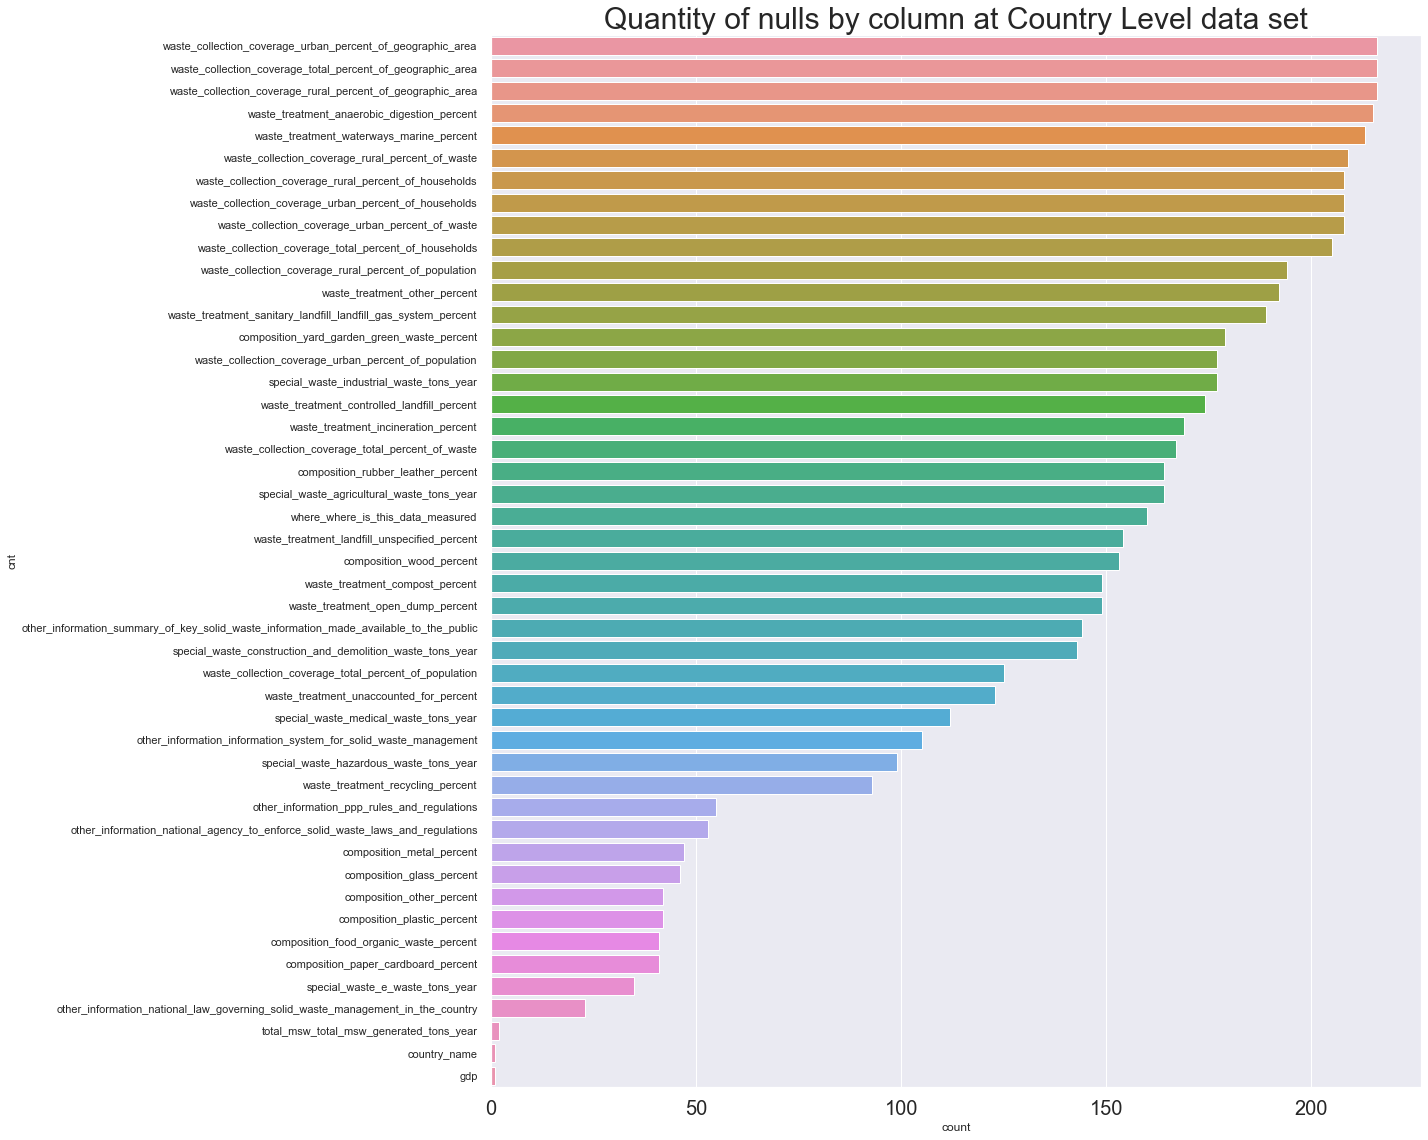

In [10]:
data = pd.DataFrame({'cnt': list(itertools.chain(*[[row['index']] * row['cnt'] for idx, row in (country_level.isnull().sum()).sort_values(ascending=False).to_frame('cnt').reset_index().iterrows()]))})
sns.set(rc={'figure.figsize':(20,16)})
ax = sns.countplot(y = 'cnt', data = data)
ax.set_title('Quantity of nulls by column at Country Level data set', fontsize=30)
plt.xticks(fontsize=20);
plt.tight_layout()
plt.savefig('Nulls_country_level.png')
plt.show()


In [11]:
def quantity_nans(data_set):
    
    data_set_copy = data_set.copy()
    
    n_nans = []
    n_nans_rows = []

    for i in range (0,data_set.shape[1]+1):
        col_nulls = i
        df_nans = data_set.iloc[data_set_copy[(data_set.isnull().sum(axis=1)>=col_nulls)].index]
        n_nans_rows.append(df_nans.shape[0])
        n_nans.append(i)

    quotients = [round(number*100 /(data_set_copy.shape[0]),2) for number in n_nans_rows]
    
    nan_values = pd.DataFrame(list(zip(n_nans, quotients)),columns = ['Nan_cols','Percentage_%'])
    
    #Lets plot it!
    
    plt.figure(1, figsize=(10, 8))
    plt.scatter(n_nans, quotients, linewidth=2)
    plt.grid()
    plt.xlabel('Null columns')
    plt.ylabel('Percentage of nulls')
    plot = plt.show()
    
    return plot, nan_values

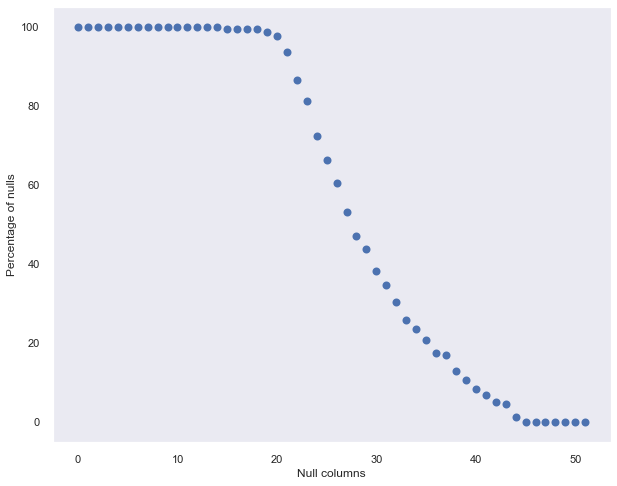

(None,
     Nan_cols  Percentage_%
 0          0        100.00
 1          1        100.00
 2          2        100.00
 3          3        100.00
 4          4        100.00
 5          5        100.00
 6          6        100.00
 7          7        100.00
 8          8        100.00
 9          9        100.00
 10        10        100.00
 11        11        100.00
 12        12        100.00
 13        13        100.00
 14        14        100.00
 15        15         99.54
 16        16         99.54
 17        17         99.54
 18        18         99.54
 19        19         98.62
 20        20         97.70
 21        21         93.55
 22        22         86.64
 23        23         81.11
 24        24         72.35
 25        25         66.36
 26        26         60.37
 27        27         53.00
 28        28         47.00
 29        29         43.78
 30        30         38.25
 31        31         34.56
 32        32         30.41
 33        33         25.81
 34        34

In [12]:
quantity_nans(country_level)

In [13]:
def nan_delete (data_set, n_cols):
    data_set_copy = data_set.copy()
    new_data = data_set_copy[data_set_copy.isnull().sum(axis=1) < n_cols]

    
    return new_data

In [14]:
countries_most_complete = nan_delete(country_level,21)
countries_most_complete.shape

(14, 51)

In [15]:
countries_most_complete.head(14)

iso3c region_id        country_name income_id           gdp  \
18    BGR       ECS            Bulgaria       UMC  22279.361328   
53    DNK       ECS             Denmark       HIC  57821.199219   
55    DZA       MEA             Algeria       UMC  11826.165039   
90    IRL       ECS             Ireland       HIC  83388.718750   
91    IRN       MEA  Iran, Islamic Rep.       UMC  14535.862305   
98    JPN       EAS               Japan       HIC  41309.957031   
107   LAO       EAS             Lao PDR       LMC   6543.666992   
115   LTU       ECS           Lithuania       HIC  37278.304688   
127   MKD       ECS      Macedonia, FYR       UMC  16147.729492   
138   MYS       EAS            Malaysia       UMC  23906.265625   
145   NOR       ECS              Norway       HIC  64962.261719   
150   PAK       SAS            Pakistan       LMC   4571.414551   
163   ROU       ECS             Romania       UMC  29983.556641   
195   TUN       MEA             Tunisia       LMC  10505.262695   

     composition_food_organic_waste_percent  composition_glass_percent  \
18                                    24.35                       5.83   
53                                    12.78                       5.78   
55                                    54.40                       1.20   
90                                    16.60                       8.50   
91                                    72.90                       1.90   
98                                    36.00                       5.00   
107                                   16.90                       9.30   
115                                   40.40                       8.65   
127                                   29.30                       4.10   
138                                   46.00                       3.00   
145                                   15.49                       4.60   
150                                   30.00                       6.00   
163                                   56.26                       4.89   
195                                   68.00                       2.00   

     composition_metal_percent  composition_other_percent  \
18                        1.98                      17.93   
53                        6.29                      23.86   
55                        2.80                       0.80   
90                        3.70                      25.80   
91                        2.30                       5.00   
98                        4.00                       6.00   
107                       3.70                      20.30   
115                       2.75                      44.05   
127                       2.50                      19.80   
138                       3.00                       9.00   
145                       6.12                      13.15   
150                       4.00                      20.00   
163                       2.50                      10.68   
195                       4.00                       5.00   

     composition_paper_cardboard_percent  composition_plastic_percent  \
18                                 14.18                        12.15   
53                                 11.57                         1.61   
55                                  9.80                        16.90   
90                                 25.00                        12.40   
91                                  7.30                         8.50   
98                                 33.00                        11.00   
107                                 2.80                         6.10   
115                                10.05                        10.15   
127                                12.80                        13.90   
138                                14.00                        15.00   
145                                26.57                         2.25   
150                                13.00                         9.00   
163                   

In [16]:
countries_most_complete.isnull().sum()

iso3c                                                                                     0
region_id                                                                                 0
country_name                                                                              0
income_id                                                                                 0
gdp                                                                                       0
composition_food_organic_waste_percent                                                    0
composition_glass_percent                                                                 0
composition_metal_percent                                                                 0
composition_other_percent                                                                 0
composition_paper_cardboard_percent                                                       0
composition_plastic_percent                                                     

In [17]:
country_level_mex = country_level[country_level['country_name']=='Mexico']

In [18]:
mex_and_completed = countries_most_complete.append(country_level_mex,sort=False)
mex_and_completed

iso3c region_id        country_name income_id           gdp  \
18    BGR       ECS            Bulgaria       UMC  22279.361328   
53    DNK       ECS             Denmark       HIC  57821.199219   
55    DZA       MEA             Algeria       UMC  11826.165039   
90    IRL       ECS             Ireland       HIC  83388.718750   
91    IRN       MEA  Iran, Islamic Rep.       UMC  14535.862305   
98    JPN       EAS               Japan       HIC  41309.957031   
107   LAO       EAS             Lao PDR       LMC   6543.666992   
115   LTU       ECS           Lithuania       HIC  37278.304688   
127   MKD       ECS      Macedonia, FYR       UMC  16147.729492   
138   MYS       EAS            Malaysia       UMC  23906.265625   
145   NOR       ECS              Norway       HIC  64962.261719   
150   PAK       SAS            Pakistan       LMC   4571.414551   
163   ROU       ECS             Romania       UMC  29983.556641   
195   TUN       MEA             Tunisia       LMC  10505.262695   
125   MEX       LCN              Mexico       UMC  19332.074219   

     composition_food_organic_waste_percent  composition_glass_percent  \
18                                    24.35                       5.83   
53                                    12.78                       5.78   
55                                    54.40                       1.20   
90                                    16.60                       8.50   
91                                    72.90                       1.90   
98                                    36.00                       5.00   
107                                   16.90                       9.30   
115                                   40.40                       8.65   
127                                   29.30                       4.10   
138                                   46.00                       3.00   
145                                   15.49                       4.60   
150                                   30.00                       6.00   
163                                   56.26                       4.89   
195                                   68.00                       2.00   
125                                   52.40                       5.90   

     composition_metal_percent  composition_other_percent  \
18                        1.98                      17.93   
53                        6.29                      23.86   
55                        2.80                       0.80   
90                        3.70                      25.80   
91                        2.30                       5.00   
98                        4.00                       6.00   
107                       3.70                      20.30   
115                       2.75                      44.05   
127                       2.50                      19.80   
138                       3.00                       9.00   
145                       6.12                      13.15   
150                       4.00                      20.00   
163                       2.50                      10.68   
195                       4.00                       5.00   
125                       3.40                      12.10   

     composition_paper_cardboard_percent  composition_plastic_percent  \
18                                 14.18                        12.15   
53                                 11.57                         1.61   
55                                  9.80                        16.90   
90                                 25.00                        12.40   
91                                  7.30                         8.50   
98                                 33.00                        11.00   
107                                 2.80                         6.10   
115                                10.05                        10.15   
127                                12.80                        13.90   
138                                14.0

In [19]:
null_columns = mex_and_completed.isnull().sum()
null_columns[null_columns>14]

waste_collection_coverage_rural_percent_of_geographic_area    15
waste_collection_coverage_rural_percent_of_households         15
waste_collection_coverage_total_percent_of_geographic_area    15
waste_collection_coverage_total_percent_of_households         15
waste_collection_coverage_urban_percent_of_geographic_area    15
waste_collection_coverage_urban_percent_of_households         15
waste_treatment_waterways_marine_percent                      15
dtype: int64

In [20]:
columns_to_delete = list(null_columns[null_columns>14].index)
mex_and_completed = mex_and_completed.drop(columns_to_delete,axis=1)
mex_and_completed.isnull().sum().sort_values(ascending=False)

waste_collection_coverage_urban_percent_of_waste                                         13
waste_treatment_other_percent                                                            13
waste_collection_coverage_rural_percent_of_waste                                         13
waste_treatment_anaerobic_digestion_percent                                              13
waste_treatment_sanitary_landfill_landfill_gas_system_percent                            11
waste_collection_coverage_rural_percent_of_population                                    11
waste_collection_coverage_urban_percent_of_population                                    11
waste_treatment_open_dump_percent                                                        10
waste_collection_coverage_total_percent_of_population                                    10
waste_treatment_controlled_landfill_percent                                              10
composition_yard_garden_green_waste_percent                                     

In [21]:
filtered_cols = mex_and_completed.isnull().sum()
filter_cols = list(filtered_cols[filtered_cols>=8].index)
filtered = mex_and_completed[filter_cols]
filtered

composition_yard_garden_green_waste_percent  \
18                                         19.18   
53                                         30.46   
55                                           NaN   
90                                          6.10   
91                                           NaN   
98                                           NaN   
107                                         1.20   
115                                          NaN   
127                                        16.00   
138                                          NaN   
145                                        14.68   
150                                        14.00   
163                                          NaN   
195                                          NaN   
125                                          NaN   

     special_waste_industrial_waste_tons_year  \
18                                        NaN   
53                                        NaN   
55                                  2547000.0   
90                                        NaN   
91                                 30000000.0   
98                                392840000.0   
107                                   49500.0   
115                                       NaN   
127                                       NaN   
138                                  831835.0   
145                                  415000.0   
150                                       NaN   
163                                       NaN   
195                                  116000.0   
125                                       NaN   

     waste_collection_coverage_rural_percent_of_population  \
18                                                 NaN       
53                                                 NaN       
55                                                87.5       
90                                                 NaN       
91                                               100.0       
98                                                 NaN       
107                                                NaN       
115                                               90.0       
127                                                NaN       
138                                                NaN       
145                                                NaN       
150                                                NaN       
163                                                NaN       
195                                                5.0       
125                                                NaN       

     waste_collection_coverage_rural_percent_of_waste  \
18                                                NaN   
53                                                NaN   
55                                                NaN   
90                                                NaN   
91                                                NaN   
98                                                NaN   
107                                              35.0   
115                                               NaN   
127                                               NaN   
138                                               NaN   
145                                               NaN   
150                                              30.0   
163                                               NaN   
195                                               NaN   
125                                               NaN   

     waste_collection_coverage_total_percent_of_population  \
18                                                 NaN       
53                                                 NaN       
55                                                 NaN       
90                                                 NaN       
91                                               100.0       
98                                                99.9       
107                                            

In [22]:
countries = mex_and_completed['country_name']
countries

18               Bulgaria
53                Denmark
55                Algeria
90                Ireland
91     Iran, Islamic Rep.
98                  Japan
107               Lao PDR
115             Lithuania
127        Macedonia, FYR
138              Malaysia
145                Norway
150              Pakistan
163               Romania
195               Tunisia
125                Mexico
Name: country_name, dtype: object

In [23]:
filtered = pd.merge(countries,filtered,left_index=True, right_index=True)
filtered

country_name  composition_yard_garden_green_waste_percent  \
18             Bulgaria                                        19.18   
53              Denmark                                        30.46   
55              Algeria                                          NaN   
90              Ireland                                         6.10   
91   Iran, Islamic Rep.                                          NaN   
98                Japan                                          NaN   
107             Lao PDR                                         1.20   
115           Lithuania                                          NaN   
127      Macedonia, FYR                                        16.00   
138            Malaysia                                          NaN   
145              Norway                                        14.68   
150            Pakistan                                        14.00   
163             Romania                                          NaN   
195             Tunisia                                          NaN   
125              Mexico                                          NaN   

     special_waste_industrial_waste_tons_year  \
18                                        NaN   
53                                        NaN   
55                                  2547000.0   
90                                        NaN   
91                                 30000000.0   
98                                392840000.0   
107                                   49500.0   
115                                       NaN   
127                                       NaN   
138                                  831835.0   
145                                  415000.0   
150                                       NaN   
163                                       NaN   
195                                  116000.0   
125                                       NaN   

     waste_collection_coverage_rural_percent_of_population  \
18                                                 NaN       
53                                                 NaN       
55                                                87.5       
90                                                 NaN       
91                                               100.0       
98                                                 NaN       
107                                                NaN       
115                                               90.0       
127                                                NaN       
138                                                NaN       
145                                                NaN       
150                                                NaN       
163                                                NaN       
195                                                5.0       
125                                                NaN       

     waste_collection_coverage_rural_percent_of_waste  \
18                                                NaN   
53                                                NaN   
55                                                NaN   
90                                                NaN   
91                                                NaN   
98                                                NaN   
107                                              35.0   
115                                               NaN   
127                                               NaN   
138                                               NaN   
145                                               NaN   
150                                              30.0   
163                                               NaN   
195                                               NaN   
125                                               NaN   

     waste_collection_coverage_total_percent_of_population  \
18                                                 NaN       
53                                         

In [100]:
filtered.sort_index(ascending=True)

country_name  composition_yard_garden_green_waste_percent  \
18             Bulgaria                                        19.18   
53              Denmark                                        30.46   
55              Algeria                                          NaN   
90              Ireland                                         6.10   
91   Iran, Islamic Rep.                                          NaN   
98                Japan                                          NaN   
107             Lao PDR                                         1.20   
115           Lithuania                                          NaN   
125              Mexico                                          NaN   
127      Macedonia, FYR                                        16.00   
138            Malaysia                                          NaN   
145              Norway                                        14.68   
150            Pakistan                                        14.00   
163             Romania                                          NaN   
195             Tunisia                                          NaN   

     special_waste_industrial_waste_tons_year  \
18                                        NaN   
53                                        NaN   
55                                  2547000.0   
90                                        NaN   
91                                 30000000.0   
98                                392840000.0   
107                                   49500.0   
115                                       NaN   
125                                       NaN   
127                                       NaN   
138                                  831835.0   
145                                  415000.0   
150                                       NaN   
163                                       NaN   
195                                  116000.0   

     waste_collection_coverage_rural_percent_of_population  \
18                                                 NaN       
53                                                 NaN       
55                                                87.5       
90                                                 NaN       
91                                               100.0       
98                                                 NaN       
107                                                NaN       
115                                               90.0       
125                                                NaN       
127                                                NaN       
138                                                NaN       
145                                                NaN       
150                                                NaN       
163                                                NaN       
195                                                5.0       

     waste_collection_coverage_rural_percent_of_waste  \
18                                                NaN   
53                                                NaN   
55                                                NaN   
90                                                NaN   
91                                                NaN   
98                                                NaN   
107                                              35.0   
115                                               NaN   
125                                               NaN   
127                                               NaN   
138                                               NaN   
145                                               NaN   
150                                              30.0   
163                                               NaN   
195                                               NaN   

     waste_collection_coverage_total_percent_of_population  \
18                                                 NaN       
53                                         

In [102]:
filtered.country_name

18               Bulgaria
53                Denmark
55                Algeria
90                Ireland
91     Iran, Islamic Rep.
98                  Japan
107               Lao PDR
115             Lithuania
127        Macedonia, FYR
138              Malaysia
145                Norway
150              Pakistan
163               Romania
195               Tunisia
125                Mexico
Name: country_name, dtype: object

### Dataset for Tableau Data visualization

In [96]:
mex_and_top14_tableau = filtered.to_csv('mex_and_top14_tableau.csv')

### Drop columns with more than 90% null values

In [24]:
print(country_level.shape)
before_fillna = country_level.isnull().sum()/country_level.shape[0]
country_level = country_level.drop(list(before_fillna[before_fillna>0.9].index), axis=1)
print('\n\n\n\n',country_level.shape)

(217, 51)




 (217, 41)


In [25]:
country_level.dtypes

iso3c                                                                                     object
region_id                                                                                 object
country_name                                                                              object
income_id                                                                                 object
gdp                                                                                      float64
composition_food_organic_waste_percent                                                   float64
composition_glass_percent                                                                float64
composition_metal_percent                                                                float64
composition_other_percent                                                                float64
composition_paper_cardboard_percent                                                      float64
composition_plastic_percent   

### Find correlation fo numeric Data

In [26]:
numeric_country = country_level._get_numeric_data()

In [27]:
numeric_country.dtypes

gdp                                                              float64
composition_food_organic_waste_percent                           float64
composition_glass_percent                                        float64
composition_metal_percent                                        float64
composition_other_percent                                        float64
composition_paper_cardboard_percent                              float64
composition_plastic_percent                                      float64
composition_rubber_leather_percent                               float64
composition_wood_percent                                         float64
composition_yard_garden_green_waste_percent                      float64
population_population_number_of_people                             int64
special_waste_agricultural_waste_tons_year                       float64
special_waste_construction_and_demolition_waste_tons_year        float64
special_waste_e_waste_tons_year                    

In [28]:
def correlation_plot (dataset):
  
  corr_plot=dataset.corr()
  plt.figure(figsize=(55, 45))
  mask = np.triu(np.ones_like(corr_plot, dtype=np.bool))
  heatmap = sns.heatmap(corr_plot, mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
  heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
  return heatmap

<AxesSubplot:title={'center':'Triangle Correlation Heatmap'}>

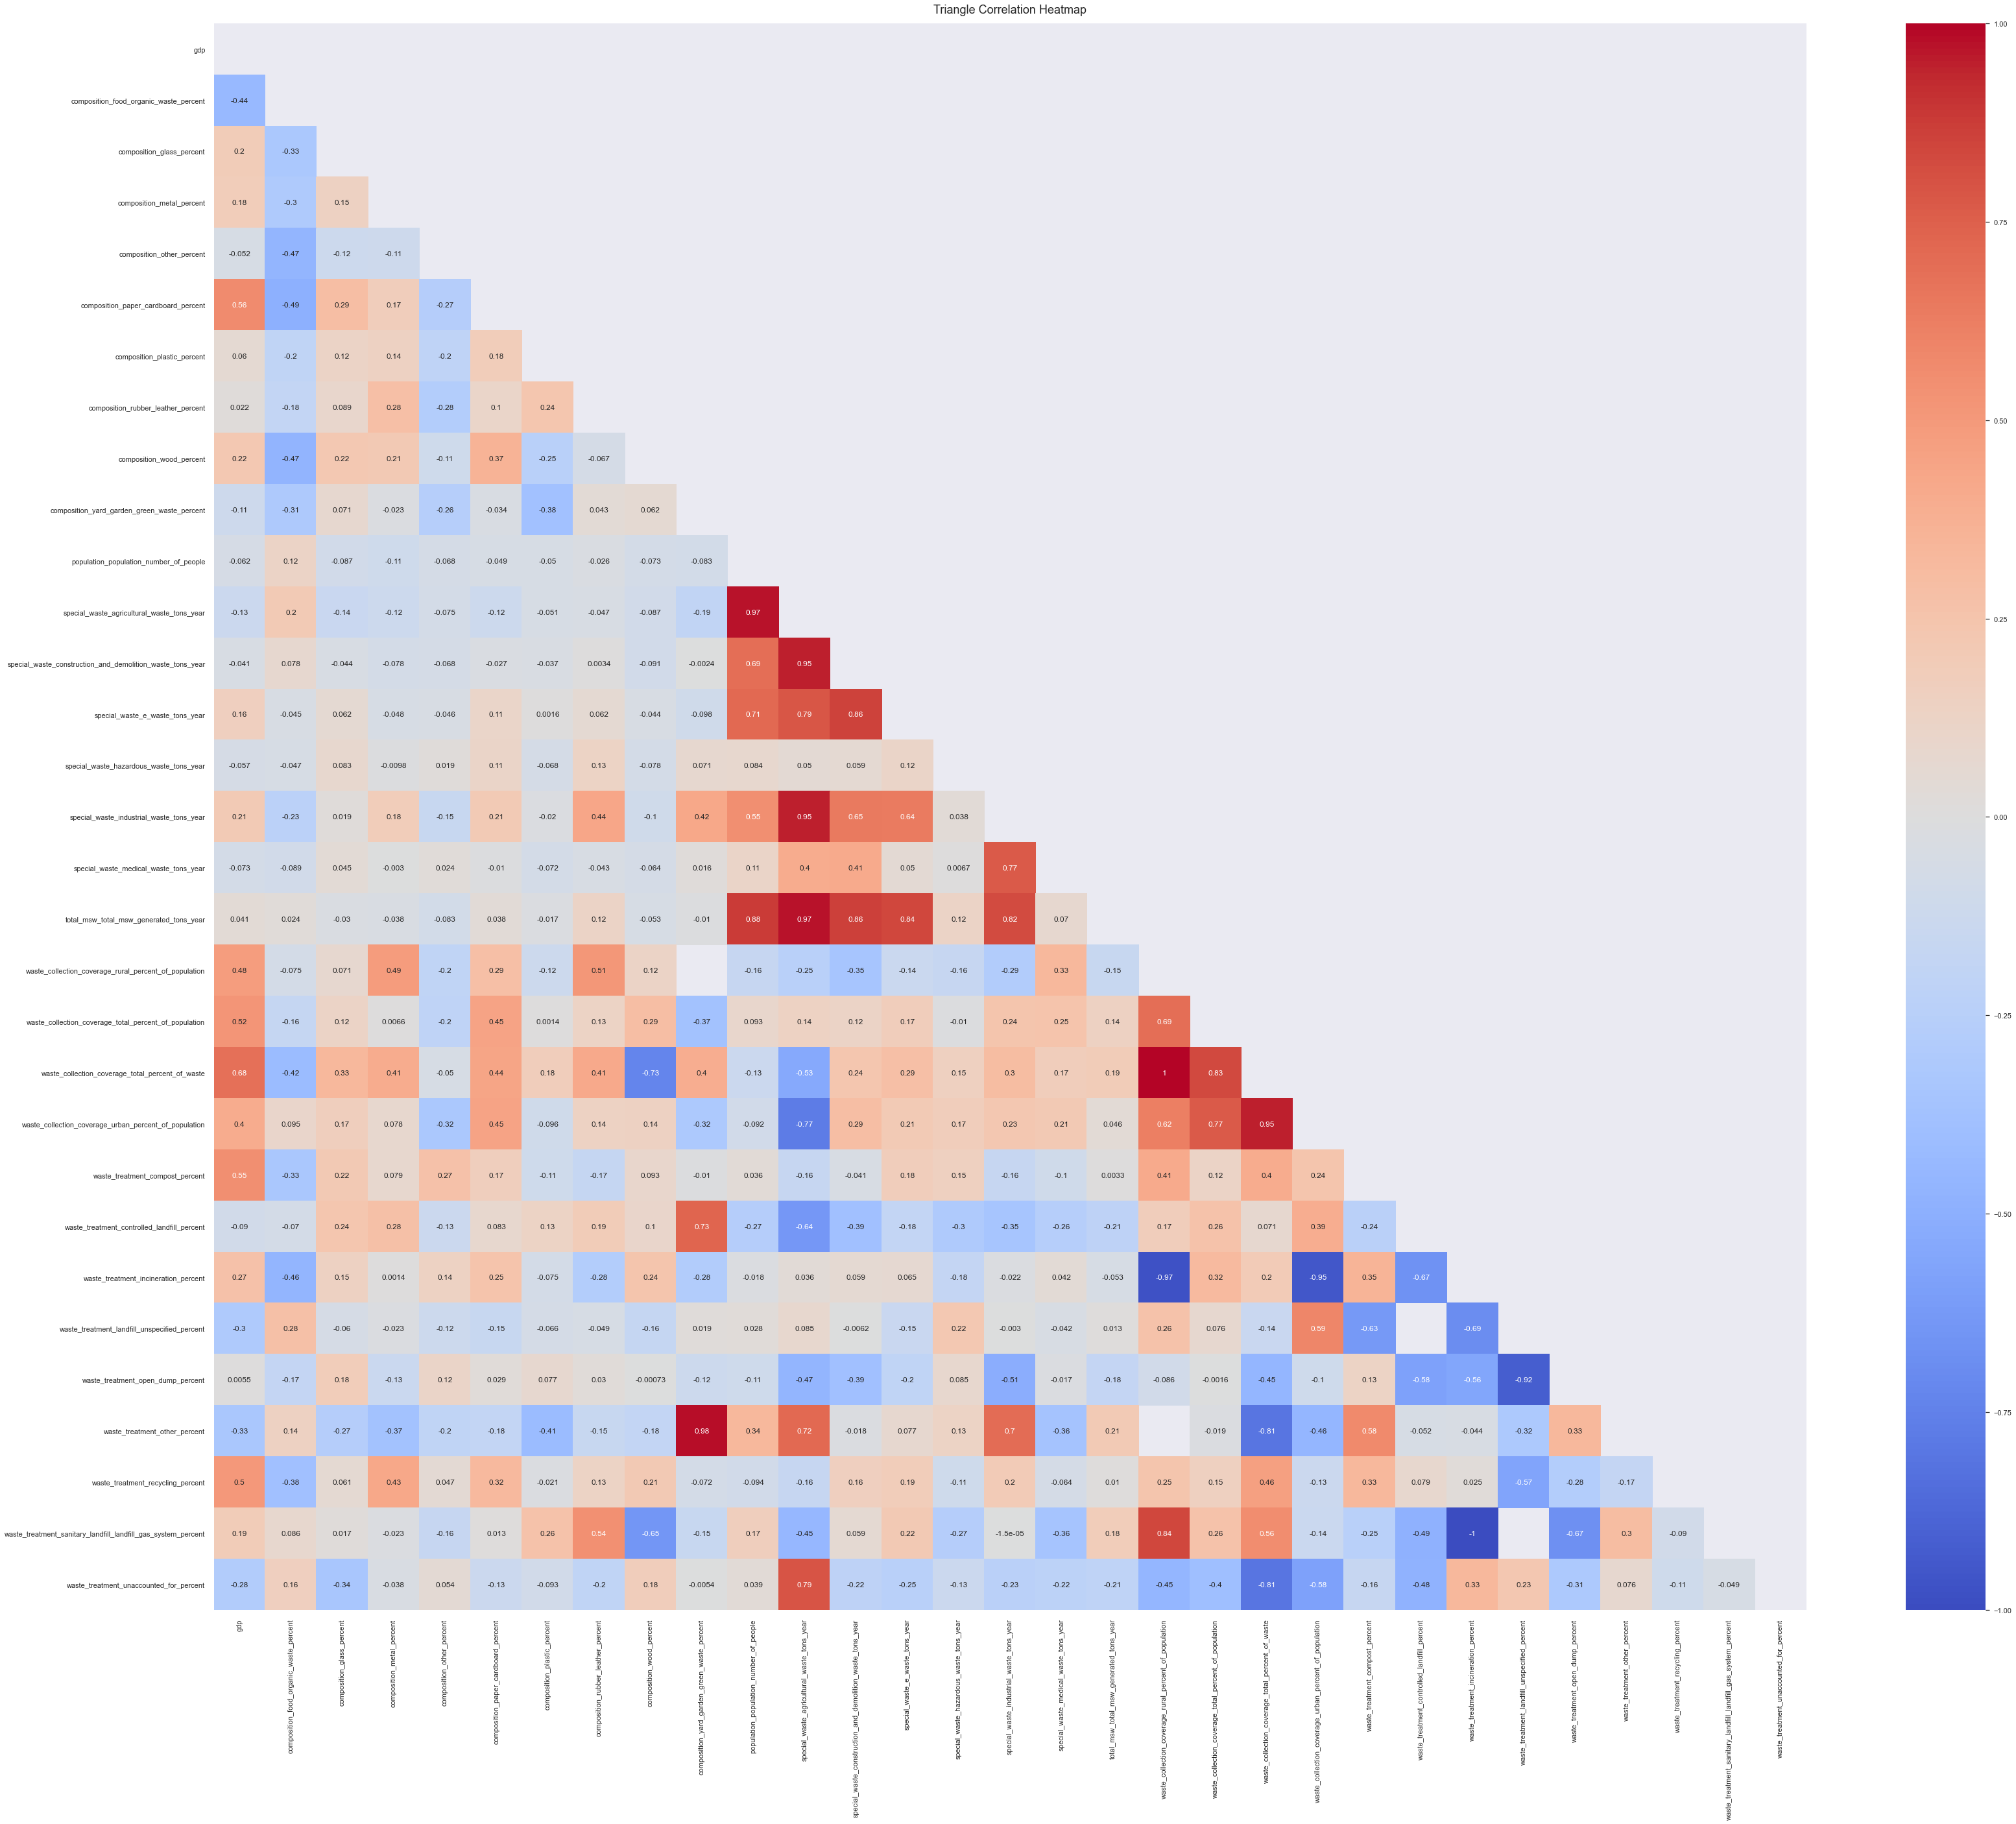

In [29]:
correlation_plot(numeric_country)

In [30]:
numeric_country.isnull().sum()

gdp                                                                1
composition_food_organic_waste_percent                            41
composition_glass_percent                                         46
composition_metal_percent                                         47
composition_other_percent                                         42
composition_paper_cardboard_percent                               41
composition_plastic_percent                                       42
composition_rubber_leather_percent                               164
composition_wood_percent                                         153
composition_yard_garden_green_waste_percent                      179
population_population_number_of_people                             0
special_waste_agricultural_waste_tons_year                       164
special_waste_construction_and_demolition_waste_tons_year        143
special_waste_e_waste_tons_year                                   35
special_waste_hazardous_waste_tons

In [31]:
numeric_country.shape[1]

31

### Use KNN Imputer to fill null numeric values

In [32]:
impute_knn = KNNImputer(n_neighbors= 15)
imputed = pd.DataFrame(impute_knn.fit_transform(numeric_country),columns = list(numeric_country.columns))

In [33]:
imputed.isnull().sum()

gdp                                                              0
composition_food_organic_waste_percent                           0
composition_glass_percent                                        0
composition_metal_percent                                        0
composition_other_percent                                        0
composition_paper_cardboard_percent                              0
composition_plastic_percent                                      0
composition_rubber_leather_percent                               0
composition_wood_percent                                         0
composition_yard_garden_green_waste_percent                      0
population_population_number_of_people                           0
special_waste_agricultural_waste_tons_year                       0
special_waste_construction_and_demolition_waste_tons_year        0
special_waste_e_waste_tons_year                                  0
special_waste_hazardous_waste_tons_year                       

In [34]:
country_level

iso3c region_id  country_name income_id           gdp  \
0     ABW       LCN         Aruba       HIC  35563.312500   
1     AFG       SAS   Afghanistan       LIC   2057.062256   
2     AGO       SSF        Angola       LMC   8036.690430   
3     ALB       ECS       Albania       UMC  13724.058594   
4     AND       ECS       Andorra       HIC  43711.800781   
..    ...       ...           ...       ...           ...   
212   XKX       ECS        Kosovo       LMC   9723.561523   
213   YEM       MEA   Yemen, Rep.       LIC   8269.671875   
214   ZAF       SSF  South Africa       UMC  12666.607422   
215   ZMB       SSF        Zambia       LMC   3201.289307   
216   ZWE       SSF      Zimbabwe       LIC   3190.506592   

     composition_food_organic_waste_percent  composition_glass_percent  \
0                                       NaN                        NaN   
1                                       NaN                        NaN   
2                                 51.800000                   6.700000   
3                                 51.400000                   4.500000   
4                                 31.200000                   8.200000   
..                                      ...                        ...   
212                               42.000000                   6.000000   
213                               65.000000                   1.000000   
214                               16.381655                   5.200216   
215                                     NaN                        NaN   
216                               36.000000                   5.000000   

     composition_metal_percent  composition_other_percent  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                     4.400000                  11.500000   
3                     4.800000                  15.210000   
4                     2.600000                  11.600000   
..                         ...                        ...   
212                   6.000000                  20.000000   
213                   6.000000                   6.000000   
214                  16.910461                  45.020646   
215                        NaN                        NaN   
216                   6.000000                   3.000000   

     composition_paper_cardboard_percent  composition_plastic_percent  \
0                                    NaN                          NaN   
1                                    NaN                          NaN   
2                              11.900000                    13.500000   
3                               9.900000                     9.600000   
4                              35.100000                    11.300000   
..                                   ...                          ...   
212                             8.000000                    11.000000   
213                             7.000000                    10.000000   
214                             9.396918                     7.090104   
215                                  NaN                          NaN   
216                            27.000000                    23.000000   

     composition_rubber_leather_percent  composition_wood_percent  \
0                                   NaN                       NaN   
1                                   NaN                       NaN   
2                                   NaN                       NaN   
3                                   NaN                       4.6   
4                                   NaN                       NaN   
..                                  ...                       ...   
212                                 NaN                       7.0   
213                                 1.0                       3.0   
214                                 NaN                       NaN   
215                                 NaN                       NaN   
216          

In [35]:
numeric_country

gdp  composition_food_organic_waste_percent  \
0    35563.312500                                     NaN   
1     2057.062256                                     NaN   
2     8036.690430                               51.800000   
3    13724.058594                               51.400000   
4    43711.800781                               31.200000   
..            ...                                     ...   
212   9723.561523                               42.000000   
213   8269.671875                               65.000000   
214  12666.607422                               16.381655   
215   3201.289307                                     NaN   
216   3190.506592                               36.000000   

     composition_glass_percent  composition_metal_percent  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                     6.700000                   4.400000   
3                     4.500000                   4.800000   
4                     8.200000                   2.600000   
..                         ...                        ...   
212                   6.000000                   6.000000   
213                   1.000000                   6.000000   
214                   5.200216                  16.910461   
215                        NaN                        NaN   
216                   5.000000                   6.000000   

     composition_other_percent  composition_paper_cardboard_percent  \
0                          NaN                                  NaN   
1                          NaN                                  NaN   
2                    11.500000                            11.900000   
3                    15.210000                             9.900000   
4                    11.600000                            35.100000   
..                         ...                                  ...   
212                  20.000000                             8.000000   
213                   6.000000                             7.000000   
214                  45.020646                             9.396918   
215                        NaN                                  NaN   
216                   3.000000                            27.000000   

     composition_plastic_percent  composition_rubber_leather_percent  \
0                            NaN                                 NaN   
1                            NaN                                 NaN   
2                      13.500000                                 NaN   
3                       9.600000                                 NaN   
4                      11.300000                                 NaN   
..                           ...                                 ...   
212                    11.000000                                 NaN   
213                    10.000000                                 1.0   
214                     7.090104                                 NaN   
215                          NaN                                 NaN   
216                    23.000000                                 NaN   

     composition_wood_percent  composition_yard_garden_green_waste_percent  \
0                         NaN                                          NaN   
1                         NaN                                          NaN   
2                         NaN                                          NaN   
3                         4.6                                          NaN   
4                         NaN                                          NaN   
..                        ...                                          ...   
212                       7.0                                          NaN   
213                       3.0                                          1.0   
214                       NaN                                          NaN   
215                       NaN                     

In [36]:
imputed

gdp  composition_food_organic_waste_percent  \
0    35563.312500                               37.833333   
1     2057.062256                               52.782000   
2     8036.690430                               51.800000   
3    13724.058594                               51.400000   
4    43711.800781                               31.200000   
..            ...                                     ...   
212   9723.561523                               42.000000   
213   8269.671875                               65.000000   
214  12666.607422                               16.381655   
215   3201.289307                               46.604760   
216   3190.506592                               36.000000   

     composition_glass_percent  composition_metal_percent  \
0                     5.813333                   5.786667   
1                     3.429333                   2.524000   
2                     6.700000                   4.400000   
3                     4.500000                   4.800000   
4                     8.200000                   2.600000   
..                         ...                        ...   
212                   6.000000                   6.000000   
213                   1.000000                   6.000000   
214                   5.200216                  16.910461   
215                   3.159021                   2.668795   
216                   5.000000                   6.000000   

     composition_other_percent  composition_paper_cardboard_percent  \
0                    15.700000                            16.540000   
1                    11.561333                            14.188667   
2                    11.500000                            11.900000   
3                    15.210000                             9.900000   
4                    11.600000                            35.100000   
..                         ...                                  ...   
212                  20.000000                             8.000000   
213                   6.000000                             7.000000   
214                  45.020646                             9.396918   
215                  22.862078                            10.708576   
216                   3.000000                            27.000000   

     composition_plastic_percent  composition_rubber_leather_percent  \
0                      12.013333                            3.878667   
1                      11.802667                            2.540000   
2                      13.500000                            2.678000   
3                       9.600000                            3.698667   
4                      11.300000                            3.878667   
..                           ...                                 ...   
212                    11.000000                            3.445333   
213                    10.000000                            1.000000   
214                     7.090104                            2.520667   
215                    11.512924                            1.588667   
216                    23.000000                            2.295333   

     composition_wood_percent  composition_yard_garden_green_waste_percent  \
0                    7.204000                                    16.566000   
1                    2.624667                                     9.460513   
2                    2.934000                                     8.603846   
3                    4.600000                                    16.857333   
4                    7.224000                                    15.532667   
..                        ...                                          ...   
212                  7.000000                                    15.532667   
213                  3.000000                                     1.000000   
214                  3.089333                                     6.787179   
215                  3.104000                     

In [37]:
print(country_level.shape)
country_level.drop(list(imputed.columns),axis=1,inplace=True)
print(country_level.shape)

(217, 41)
(217, 10)


In [38]:
country_level = pd.merge(country_level,imputed,left_index=True, right_index=True)

In [39]:
country_level.shape

(217, 41)

In [40]:
country_level.isnull().sum()

iso3c                                                                                      0
region_id                                                                                  0
country_name                                                                               1
income_id                                                                                  0
other_information_information_system_for_solid_waste_management                          105
other_information_national_agency_to_enforce_solid_waste_laws_and_regulations             53
other_information_national_law_governing_solid_waste_management_in_the_country            23
other_information_ppp_rules_and_regulations                                               55
other_information_summary_of_key_solid_waste_information_made_available_to_the_public    144
where_where_is_this_data_measured                                                        160
gdp                                                                   

In [41]:
null_columns=country_level.columns[country_level.isnull().any()]
country_level[country_level["country_name"].isnull()][null_columns]

country_name  \
198          NaN   

    other_information_information_system_for_solid_waste_management  \
198                                                NaN                

    other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  \
198                                                NaN                              

    other_information_national_law_governing_solid_waste_management_in_the_country  \
198                                                Yes                               

    other_information_ppp_rules_and_regulations  \
198                                         Yes   

    other_information_summary_of_key_solid_waste_information_made_available_to_the_public  \
198                                                NaN                                      

    where_where_is_this_data_measured  
198                               NaN

In [42]:
country_level_null = country_level[(country_level['country_name'].isnull()==True)]
country_level_null

iso3c region_id country_name income_id  \
198   TWN       EAS          NaN       HIC   

    other_information_information_system_for_solid_waste_management  \
198                                                NaN                

    other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  \
198                                                NaN                              

    other_information_national_law_governing_solid_waste_management_in_the_country  \
198                                                Yes                               

    other_information_ppp_rules_and_regulations  \
198                                         Yes   

    other_information_summary_of_key_solid_waste_information_made_available_to_the_public  \
198                                                NaN                                      

    where_where_is_this_data_measured           gdp  \
198                               NaN  57362.925781   

     composition_food_organic_waste_percent  composition_glass_percent  \
198                                   23.34                       4.11   

     composition_metal_percent  composition_other_percent  \
198                       3.07                      14.11   

     composition_paper_cardboard_percent  composition_plastic_percent  \
198                                30.01                        20.23   

     composition_rubber_leather_percent  composition_wood_percent  \
198                                 0.6                     3.134   

     composition_yard_garden_green_waste_percent  \
198                                         4.43   

     population_population_number_of_people  \
198                              23434000.0   

     special_waste_agricultural_waste_tons_year  \
198                                5.388541e+06   

     special_waste_construction_and_demolition_waste_tons_year  \
198                                         49686767.4           

     special_waste_e_waste_tons_year  special_waste_hazardous_waste_tons_year  \
198                          14036.0                             1.126603e+06   

     special_waste_industrial_waste_tons_year  \
198                              7.760385e+07   

     special_waste_medical_waste_tons_year  \
198                          457835.660667   

     total_msw_total_msw_generated_tons_year  \
198                                7336000.0   

     waste_collection_coverage_rural_percent_of_population  \
198                                             51.776       

     waste_collection_coverage_total_percent_of_population  \
198                                          57.468667       

     waste_collection_coverage_total_percent_of_waste  \
198                                         83.981333   

     waste_collection_coverage_urban_percent_of_population  \
198                                          81.513333       

     waste_treatment_compost_percent  \
198                         7.613133   

     waste_treatment_controlled_landfill_percent  \
198                                    34.999333   

     waste_treatment_incineration_percent  \
198                                  64.2   

     waste_treatment_landfill_unspecified_percent  \
198                                          34.8   

     waste_treatment_open_dump_percent  waste_treatment_other_percent  \
198                          59.853333                            1.0   

     waste_treatment_recycling_percent  \
198                              9.984   

     waste_treatment_sanitary_landfill_landfill_gas_system_percent  \
198                                             32.604               

     waste_treatment_unaccounted_for_percent  
198                                36.196667

In [43]:
country_level.loc[[198]].isnull().sum().sum()/country_level.shape[1]


0.12195121951219512

In [44]:
country_level = country_level.drop(198)
country_level.isnull().sum()

iso3c                                                                                      0
region_id                                                                                  0
country_name                                                                               0
income_id                                                                                  0
other_information_information_system_for_solid_waste_management                          104
other_information_national_agency_to_enforce_solid_waste_laws_and_regulations             52
other_information_national_law_governing_solid_waste_management_in_the_country            23
other_information_ppp_rules_and_regulations                                               55
other_information_summary_of_key_solid_waste_information_made_available_to_the_public    143
where_where_is_this_data_measured                                                        159
gdp                                                                   

### Use fillna to fill null non-numeric values

In [45]:
country_level = country_level.fillna('Unspecified')

In [46]:
country_level.isnull().sum().sum()

0

In [47]:
country_level.dtypes

iso3c                                                                                     object
region_id                                                                                 object
country_name                                                                              object
income_id                                                                                 object
other_information_information_system_for_solid_waste_management                           object
other_information_national_agency_to_enforce_solid_waste_laws_and_regulations             object
other_information_national_law_governing_solid_waste_management_in_the_country            object
other_information_ppp_rules_and_regulations                                               object
other_information_summary_of_key_solid_waste_information_made_available_to_the_public     object
where_where_is_this_data_measured                                                         object
gdp                           

In [48]:
len(country_level.where_where_is_this_data_measured.unique())

17

In [49]:
country_level_tableau = country_level.to_csv('country_level_tableau.csv')

In [50]:
country_level_wclusters=country_level.copy()
country_level_wclusters.isnull().sum()

iso3c                                                                                    0
region_id                                                                                0
country_name                                                                             0
income_id                                                                                0
other_information_information_system_for_solid_waste_management                          0
other_information_national_agency_to_enforce_solid_waste_laws_and_regulations            0
other_information_national_law_governing_solid_waste_management_in_the_country           0
other_information_ppp_rules_and_regulations                                              0
other_information_summary_of_key_solid_waste_information_made_available_to_the_public    0
where_where_is_this_data_measured                                                        0
gdp                                                                                      0

In [51]:
country_enc = CountFrequencyEncoder(encoding_method = 'frequency')
country_level = country_enc.fit_transform(country_level)

In [52]:
country_level.isnull().sum().sum()

0

In [53]:
country_level.dtypes

iso3c                                                                                    float64
region_id                                                                                float64
country_name                                                                             float64
income_id                                                                                float64
other_information_information_system_for_solid_waste_management                          float64
other_information_national_agency_to_enforce_solid_waste_laws_and_regulations            float64
other_information_national_law_governing_solid_waste_management_in_the_country           float64
other_information_ppp_rules_and_regulations                                              float64
other_information_summary_of_key_solid_waste_information_made_available_to_the_public    float64
where_where_is_this_data_measured                                                        float64
gdp                           

In [54]:
country_level

iso3c  region_id  country_name  income_id  \
0    0.00463   0.194444       0.00463   0.370370   
1    0.00463   0.037037       0.00463   0.152778   
2    0.00463   0.222222       0.00463   0.217593   
3    0.00463   0.268519       0.00463   0.259259   
4    0.00463   0.268519       0.00463   0.370370   
..       ...        ...           ...        ...   
212  0.00463   0.268519       0.00463   0.217593   
213  0.00463   0.097222       0.00463   0.152778   
214  0.00463   0.222222       0.00463   0.259259   
215  0.00463   0.222222       0.00463   0.217593   
216  0.00463   0.222222       0.00463   0.152778   

     other_information_information_system_for_solid_waste_management  \
0                                             0.481481                 
1                                             0.481481                 
2                                             0.481481                 
3                                             0.203704                 
4                                             0.481481                 
..                                                 ...                 
212                                           0.296296                 
213                                           0.203704                 
214                                           0.296296                 
215                                           0.481481                 
216                                           0.481481                 

     other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  \
0                                             0.685185                               
1                                             0.685185                               
2                                             0.240741                               
3                                             0.685185                               
4                                             0.685185                               
..                                                 ...                               
212                                           0.685185                               
213                                           0.685185                               
214                                           0.685185                               
215                                           0.240741                               
216                                           0.240741                               

     other_information_national_law_governing_solid_waste_management_in_the_country  \
0                                             0.810185                                
1                                             0.810185                                
2                                             0.810185                                
3                                             0.810185                                
4                                             0.810185                                
..                                                 ...                                
212                                           0.810185                                
213                                           0.810185                                
214                                           0.810185                                
215                                           0.810185                                
216                                           0.810185                                

     other_information_ppp_rules_and_regulations  \
0                                       0.532407   
1                                       0.532407   
2                                       0.532407   
3                                       0.532407   
4                                       0.532407   
..                                           ...   
212                                     0.532407   
213                    

In [55]:
country_level.shape

(216, 41)

In [56]:
country_level_std = StandardScaler().fit_transform(country_level)
country_level_standarized = pd.DataFrame(country_level_std,columns=list(country_level.columns))
country_level_standarized

iso3c  region_id  country_name  income_id  \
0      0.0  -0.057258           0.0   1.188173   
1      0.0  -2.530812           0.0  -1.524902   
2      0.0   0.379251           0.0  -0.716752   
3      0.0   1.106767           0.0  -0.197227   
4      0.0   1.106767           0.0   1.188173   
..     ...        ...           ...        ...   
211    0.0   1.106767           0.0  -0.716752   
212    0.0  -1.585042           0.0  -1.524902   
213    0.0   0.379251           0.0  -0.197227   
214    0.0   0.379251           0.0  -0.716752   
215    0.0   0.379251           0.0  -1.524902   

     other_information_information_system_for_solid_waste_management  \
0                                             0.965908                 
1                                             0.965908                 
2                                             0.965908                 
3                                            -1.269479                 
4                                             0.965908                 
..                                                 ...                 
211                                          -0.524350                 
212                                          -1.269479                 
213                                          -0.524350                 
214                                           0.965908                 
215                                           0.965908                 

     other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  \
0                                             0.666409                               
1                                             0.666409                               
2                                            -1.270604                               
3                                             0.666409                               
4                                             0.666409                               
..                                                 ...                               
211                                           0.666409                               
212                                           0.666409                               
213                                           0.666409                               
214                                          -1.270604                               
215                                          -1.270604                               

     other_information_national_law_governing_solid_waste_management_in_the_country  \
0                                             0.483812                                
1                                             0.483812                                
2                                             0.483812                                
3                                             0.483812                                
4                                             0.483812                                
..                                                 ...                                
211                                           0.483812                                
212                                           0.483812                                
213                                           0.483812                                
214                                           0.483812                                
215                                           0.483812                                

     other_information_ppp_rules_and_regulations  \
0                                       0.915088   
1                                       0.915088   
2                                       0.915088   
3                                       0.915088   
4                                       0.915088   
..                                           ...   
211                                     0.915088   
212                                    -1.203

In [57]:
country_level.shape

(216, 41)

In [58]:
country_level_standarized.shape

(216, 41)

In [59]:
temp = country_level.iloc[:,[0,2]]
temp.reset_index(drop=True, inplace=True)

In [60]:
temp

iso3c  country_name
0    0.00463       0.00463
1    0.00463       0.00463
2    0.00463       0.00463
3    0.00463       0.00463
4    0.00463       0.00463
..       ...           ...
211  0.00463       0.00463
212  0.00463       0.00463
213  0.00463       0.00463
214  0.00463       0.00463
215  0.00463       0.00463

[216 rows x 2 columns]

In [61]:
temp_2 = country_level_standarized.drop(['iso3c','country_name'],axis=1)
temp_2.reset_index(drop=True, inplace=True)

In [62]:
#country_level = pd.merge(country_level.loc[:,['iso3c','country_name']],country_level_standarized.drop(['iso3c','country_name'],axis=1),left_index=True, right_index=True)
country_level = pd.merge(temp,temp_2,left_index=True, right_index=True)
country_level

iso3c  country_name  region_id  income_id  \
0    0.00463       0.00463  -0.057258   1.188173   
1    0.00463       0.00463  -2.530812  -1.524902   
2    0.00463       0.00463   0.379251  -0.716752   
3    0.00463       0.00463   1.106767  -0.197227   
4    0.00463       0.00463   1.106767   1.188173   
..       ...           ...        ...        ...   
211  0.00463       0.00463   1.106767  -0.716752   
212  0.00463       0.00463  -1.585042  -1.524902   
213  0.00463       0.00463   0.379251  -0.197227   
214  0.00463       0.00463   0.379251  -0.716752   
215  0.00463       0.00463   0.379251  -1.524902   

     other_information_information_system_for_solid_waste_management  \
0                                             0.965908                 
1                                             0.965908                 
2                                             0.965908                 
3                                            -1.269479                 
4                                             0.965908                 
..                                                 ...                 
211                                          -0.524350                 
212                                          -1.269479                 
213                                          -0.524350                 
214                                           0.965908                 
215                                           0.965908                 

     other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  \
0                                             0.666409                               
1                                             0.666409                               
2                                            -1.270604                               
3                                             0.666409                               
4                                             0.666409                               
..                                                 ...                               
211                                           0.666409                               
212                                           0.666409                               
213                                           0.666409                               
214                                          -1.270604                               
215                                          -1.270604                               

     other_information_national_law_governing_solid_waste_management_in_the_country  \
0                                             0.483812                                
1                                             0.483812                                
2                                             0.483812                                
3                                             0.483812                                
4                                             0.483812                                
..                                                 ...                                
211                                           0.483812                                
212                                           0.483812                                
213                                           0.483812                                
214                                           0.483812                                
215                                           0.483812                                

     other_information_ppp_rules_and_regulations  \
0                                       0.915088   
1                                       0.915088   
2                                       0.915088   
3                                       0.915088   
4                                       0.915088   
..                                           ...   
211                                     0.915088   
212                    

In [63]:
print(country_level.shape)
print(country_level.isnull().sum())

(216, 41)
iso3c                                                                                    0
country_name                                                                             0
region_id                                                                                0
income_id                                                                                0
other_information_information_system_for_solid_waste_management                          0
other_information_national_agency_to_enforce_solid_waste_laws_and_regulations            0
other_information_national_law_governing_solid_waste_management_in_the_country           0
other_information_ppp_rules_and_regulations                                              0
other_information_summary_of_key_solid_waste_information_made_available_to_the_public    0
where_where_is_this_data_measured                                                        0
gdp                                                                             

In [64]:
country_level_null = country_level[(country_level['country_name'].isnull()==True)]
country_level_null

Empty DataFrame
Columns: [iso3c, country_name, region_id, income_id, other_information_information_system_for_solid_waste_management, other_information_national_agency_to_enforce_solid_waste_laws_and_regulations, other_information_national_law_governing_solid_waste_management_in_the_country, other_information_ppp_rules_and_regulations, other_information_summary_of_key_solid_waste_information_made_available_to_the_public, where_where_is_this_data_measured, gdp, composition_food_organic_waste_percent, composition_glass_percent, composition_metal_percent, composition_other_percent, composition_paper_cardboard_percent, composition_plastic_percent, composition_rubber_leather_percent, composition_wood_percent, composition_yard_garden_green_waste_percent, population_population_number_of_people, special_waste_agricultural_waste_tons_year, special_waste_construction_and_demolition_waste_tons_year, special_waste_e_waste_tons_year, special_waste_hazardous_waste_tons_year, special_waste_industrial_waste_tons_year, special_waste_medical_waste_tons_year, total_msw_total_msw_generated_tons_year, waste_collection_coverage_rural_percent_of_population, waste_collection_coverage_total_percent_of_population, waste_collection_coverage_total_percent_of_waste, waste_collection_coverage_urban_percent_of_population, waste_treatment_compost_percent, waste_treatment_controlled_landfill_percent, waste_treatment_incineration_percent, waste_treatment_landfill_unspecified_percent, waste_treatment_open_dump_percent, waste_treatment_other_percent, waste_treatment_recycling_percent, waste_treatment_sanitary_landfill_landfill_gas_system_percent, waste_treatment_unaccounted_for_percent]
Index: []

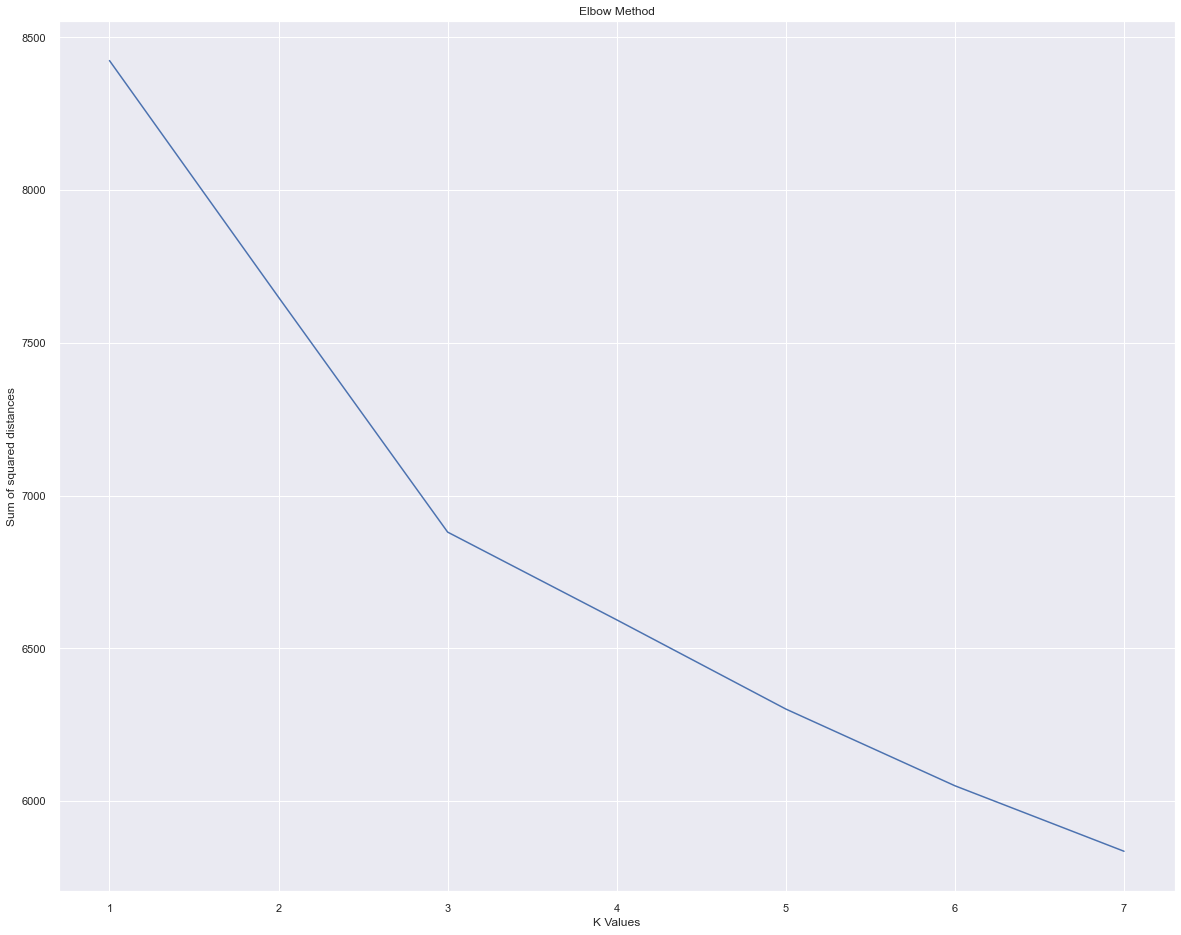

In [65]:
K = range(1,8)
sum_of_squared_distances = []
for k in K:
  model = KMeans(n_clusters=k).fit(country_level)
  sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("K Values")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method")
plt.show()

In [66]:
country_level_kmeans = country_level.copy()
country_level_kmeans

iso3c  country_name  region_id  income_id  \
0    0.00463       0.00463  -0.057258   1.188173   
1    0.00463       0.00463  -2.530812  -1.524902   
2    0.00463       0.00463   0.379251  -0.716752   
3    0.00463       0.00463   1.106767  -0.197227   
4    0.00463       0.00463   1.106767   1.188173   
..       ...           ...        ...        ...   
211  0.00463       0.00463   1.106767  -0.716752   
212  0.00463       0.00463  -1.585042  -1.524902   
213  0.00463       0.00463   0.379251  -0.197227   
214  0.00463       0.00463   0.379251  -0.716752   
215  0.00463       0.00463   0.379251  -1.524902   

     other_information_information_system_for_solid_waste_management  \
0                                             0.965908                 
1                                             0.965908                 
2                                             0.965908                 
3                                            -1.269479                 
4                                             0.965908                 
..                                                 ...                 
211                                          -0.524350                 
212                                          -1.269479                 
213                                          -0.524350                 
214                                           0.965908                 
215                                           0.965908                 

     other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  \
0                                             0.666409                               
1                                             0.666409                               
2                                            -1.270604                               
3                                             0.666409                               
4                                             0.666409                               
..                                                 ...                               
211                                           0.666409                               
212                                           0.666409                               
213                                           0.666409                               
214                                          -1.270604                               
215                                          -1.270604                               

     other_information_national_law_governing_solid_waste_management_in_the_country  \
0                                             0.483812                                
1                                             0.483812                                
2                                             0.483812                                
3                                             0.483812                                
4                                             0.483812                                
..                                                 ...                                
211                                           0.483812                                
212                                           0.483812                                
213                                           0.483812                                
214                                           0.483812                                
215                                           0.483812                                

     other_information_ppp_rules_and_regulations  \
0                                       0.915088   
1                                       0.915088   
2                                       0.915088   
3                                       0.915088   
4                                       0.915088   
..                                           ...   
211                                     0.915088   
212                    

In [67]:
country_level_wclusters

iso3c region_id  country_name income_id  \
0     ABW       LCN         Aruba       HIC   
1     AFG       SAS   Afghanistan       LIC   
2     AGO       SSF        Angola       LMC   
3     ALB       ECS       Albania       UMC   
4     AND       ECS       Andorra       HIC   
..    ...       ...           ...       ...   
212   XKX       ECS        Kosovo       LMC   
213   YEM       MEA   Yemen, Rep.       LIC   
214   ZAF       SSF  South Africa       UMC   
215   ZMB       SSF        Zambia       LMC   
216   ZWE       SSF      Zimbabwe       LIC   

    other_information_information_system_for_solid_waste_management  \
0                                          Unspecified                
1                                          Unspecified                
2                                          Unspecified                
3                                                   No                
4                                          Unspecified                
..                                                 ...                
212                                                Yes                
213                                                 No                
214                                                Yes                
215                                        Unspecified                
216                                        Unspecified                

    other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  \
0                                                  Yes                              
1                                                  Yes                              
2                                          Unspecified                              
3                                                  Yes                              
4                                                  Yes                              
..                                                 ...                              
212                                                Yes                              
213                                                Yes                              
214                                                Yes                              
215                                        Unspecified                              
216                                        Unspecified                              

    other_information_national_law_governing_solid_waste_management_in_the_country  \
0                                                  Yes                               
1                                                  Yes                               
2                                                  Yes                               
3                                                  Yes                               
4                                                  Yes                               
..                                                 ...                               
212                                                Yes                               
213                                                Yes                               
214                                                Yes                               
215                                                Yes                               
216                                                Yes                               

    other_information_ppp_rules_and_regulations  \
0                                           Yes   
1                                           Yes   
2                                           Yes   
3                                           Yes   
4                                           Yes   
..                                          ...   
212                                         Yes   
213                                          No   
214                                 Unspecified   
215                   

In [68]:
k_means = KMeans(n_clusters=3)
city_clusters = k_means.fit(country_level_kmeans)
labels = k_means.labels_

In [69]:
country_level_wclusters.shape

(216, 41)

In [70]:
df_clusters = country_level_wclusters.assign(Clusters=labels)
k_means=df_clusters.groupby(['Clusters']).mean().round(4)

In [71]:
k_means

gdp  composition_food_organic_waste_percent  \
Clusters                                                       
0         28029.1598                                 39.7004   
1          8385.4033                                 49.6686   
2         38071.9832                                 33.3631   

          composition_glass_percent  composition_metal_percent  \
Clusters                                                         
0                            3.7431                     4.4544   
1                            3.4964                     2.8976   
2                            6.1395                     5.6746   

          composition_other_percent  composition_paper_cardboard_percent  \
Clusters                                                                   
0                            9.8542                              17.8222   
1                           19.7207                              11.5573   
2                           17.3283                              18.9756   

          composition_plastic_percent  composition_rubber_leather_percent  \
Clusters                                                                    
0                             11.8153                              4.5567   
1                             10.6292                              2.2987   
2                             12.8971                              3.1430   

          composition_wood_percent  \
Clusters                             
0                           3.5911   
1                           4.5628   
2                           5.9685   

          composition_yard_garden_green_waste_percent  \
Clusters                                                
0                                             11.4051   
1                                             10.3570   
2                                             13.5903   

          population_population_number_of_people  \
Clusters                                           
0                                   1.026452e+09   
1                                   2.899187e+07   
2                                   9.414312e+06   

          special_waste_agricultural_waste_tons_year  \
Clusters                                               
0                                       1.349477e+09   
1                                       9.836465e+06   
2                                       3.939383e+06   

          special_waste_construction_and_demolition_waste_tons_year  \
Clusters                                                              
0                                              6.871667e+08           
1                                              2.910495e+07           
2                                              2.109840e+07           

          special_waste_e_waste_tons_year  \
Clusters                                    
0                            3.783667e+06   
1                            1.137246e+05   
2                            2.126497e+05   

          special_waste_hazardous_waste_tons_year  \
Clusters                                            
0                                    2.363980e+07   
1                                    7.245407e+06   
2                                    2.219962e+06   

          special_waste_industrial_waste_tons_year  \
Clusters                                             
0                                     3.803402e+09   
1                                     2.943770e+07   
2                                     1.930304e+07   

          special_waste_medical_waste_tons_year  \
Clusters                                          
0                                  9.291631e+05   
1                                  3.139472e+06   
2                                  8.448129e+05   

          total_msw_total_msw_generated_tons_year  \
Clusters                                            
0                                    2.833520e+08   
1                                    6.702415

In [72]:
df_clusters

iso3c region_id  country_name income_id  \
0     ABW       LCN         Aruba       HIC   
1     AFG       SAS   Afghanistan       LIC   
2     AGO       SSF        Angola       LMC   
3     ALB       ECS       Albania       UMC   
4     AND       ECS       Andorra       HIC   
..    ...       ...           ...       ...   
212   XKX       ECS        Kosovo       LMC   
213   YEM       MEA   Yemen, Rep.       LIC   
214   ZAF       SSF  South Africa       UMC   
215   ZMB       SSF        Zambia       LMC   
216   ZWE       SSF      Zimbabwe       LIC   

    other_information_information_system_for_solid_waste_management  \
0                                          Unspecified                
1                                          Unspecified                
2                                          Unspecified                
3                                                   No                
4                                          Unspecified                
..                                                 ...                
212                                                Yes                
213                                                 No                
214                                                Yes                
215                                        Unspecified                
216                                        Unspecified                

    other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  \
0                                                  Yes                              
1                                                  Yes                              
2                                          Unspecified                              
3                                                  Yes                              
4                                                  Yes                              
..                                                 ...                              
212                                                Yes                              
213                                                Yes                              
214                                                Yes                              
215                                        Unspecified                              
216                                        Unspecified                              

    other_information_national_law_governing_solid_waste_management_in_the_country  \
0                                                  Yes                               
1                                                  Yes                               
2                                                  Yes                               
3                                                  Yes                               
4                                                  Yes                               
..                                                 ...                               
212                                                Yes                               
213                                                Yes                               
214                                                Yes                               
215                                                Yes                               
216                                                Yes                               

    other_information_ppp_rules_and_regulations  \
0                                           Yes   
1                                           Yes   
2                                           Yes   
3                                           Yes   
4                                           Yes   
..                                          ...   
212                                         Yes   
213                                          No   
214                                 Unspecified   
215                   

In [73]:
list(df_clusters._get_numeric_data().columns)

['gdp',
 'composition_food_organic_waste_percent',
 'composition_glass_percent',
 'composition_metal_percent',
 'composition_other_percent',
 'composition_paper_cardboard_percent',
 'composition_plastic_percent',
 'composition_rubber_leather_percent',
 'composition_wood_percent',
 'composition_yard_garden_green_waste_percent',
 'population_population_number_of_people',
 'special_waste_agricultural_waste_tons_year',
 'special_waste_construction_and_demolition_waste_tons_year',
 'special_waste_e_waste_tons_year',
 'special_waste_hazardous_waste_tons_year',
 'special_waste_industrial_waste_tons_year',
 'special_waste_medical_waste_tons_year',
 'total_msw_total_msw_generated_tons_year',
 'waste_collection_coverage_rural_percent_of_population',
 'waste_collection_coverage_total_percent_of_population',
 'waste_collection_coverage_total_percent_of_waste',
 'waste_collection_coverage_urban_percent_of_population',
 'waste_treatment_compost_percent',
 'waste_treatment_controlled_landfill_percent

In [74]:
composition = ['composition_food_organic_waste_percent',
               'composition_glass_percent',
                 'composition_metal_percent',
                 'composition_other_percent',
                 'composition_paper_cardboard_percent',
                 'composition_plastic_percent',
                 'composition_rubber_leather_percent',
                 'composition_wood_percent',
                 'composition_yard_garden_green_waste_percent',]

special=['special_waste_agricultural_waste_tons_year',
         'special_waste_construction_and_demolition_waste_tons_year',
         'special_waste_e_waste_tons_year',
         'special_waste_hazardous_waste_tons_year',
         'special_waste_industrial_waste_tons_year',
         'special_waste_medical_waste_tons_year']

waste_collection =['waste_collection_coverage_rural_percent_of_population',
                 'waste_collection_coverage_total_percent_of_population',
                 'waste_collection_coverage_total_percent_of_waste',
                 'waste_collection_coverage_urban_percent_of_population']

waste_treatment=['waste_treatment_compost_percent',
                 'waste_treatment_controlled_landfill_percent',
                 'waste_treatment_incineration_percent',
                 'waste_treatment_landfill_unspecified_percent',
                 'waste_treatment_open_dump_percent',
                 'waste_treatment_other_percent',
                 'waste_treatment_recycling_percent',
                 'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
                 'waste_treatment_unaccounted_for_percent']

building = ['composition_metal_percent','special_waste_construction_and_demolition_waste_tons_year','waste_collection_coverage_total_percent_of_waste']
food = ['composition_food_organic_waste_percent','special_waste_agricultural_waste_tons_year','waste_collection_coverage_total_percent_of_waste','waste_treatment_unaccounted_for_percent']

Text(0.5, 0.98, 'My Pairplot')

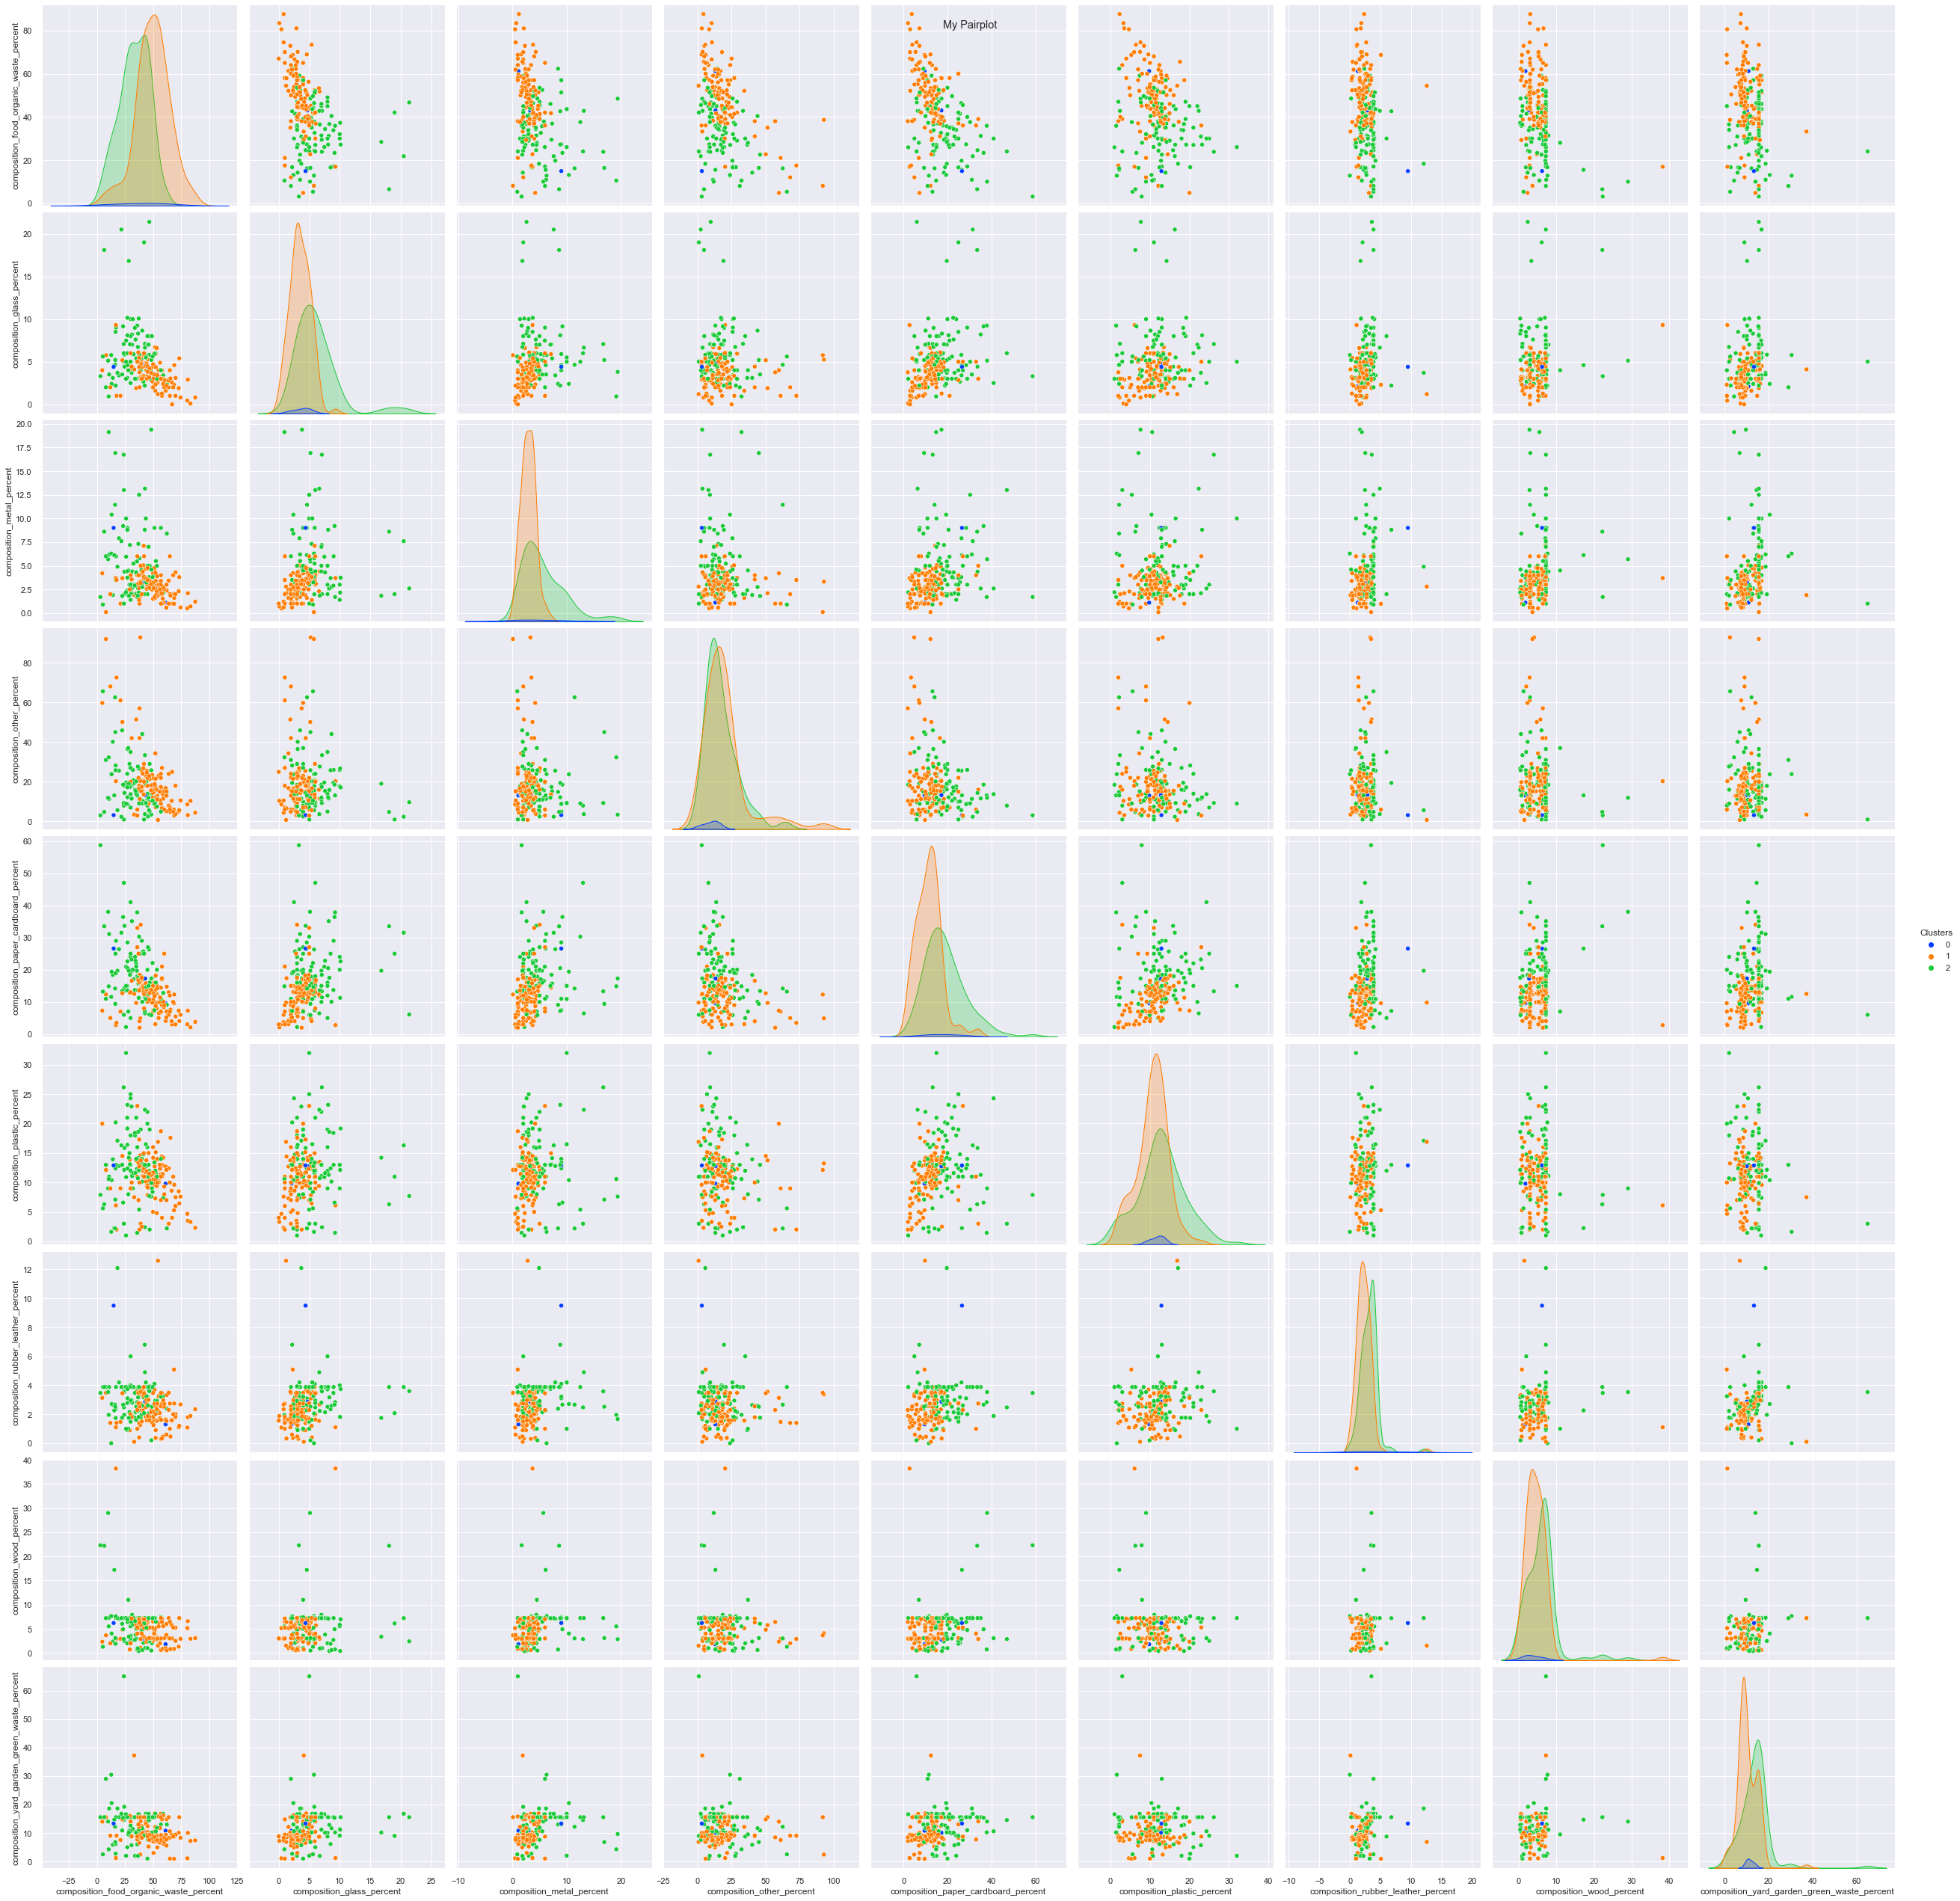

In [75]:
composition = sns.pairplot(df_clusters, hue='Clusters', height=4, vars= composition,kind= 'scatter', palette="bright")
composition.fig.suptitle("My Pairplot")


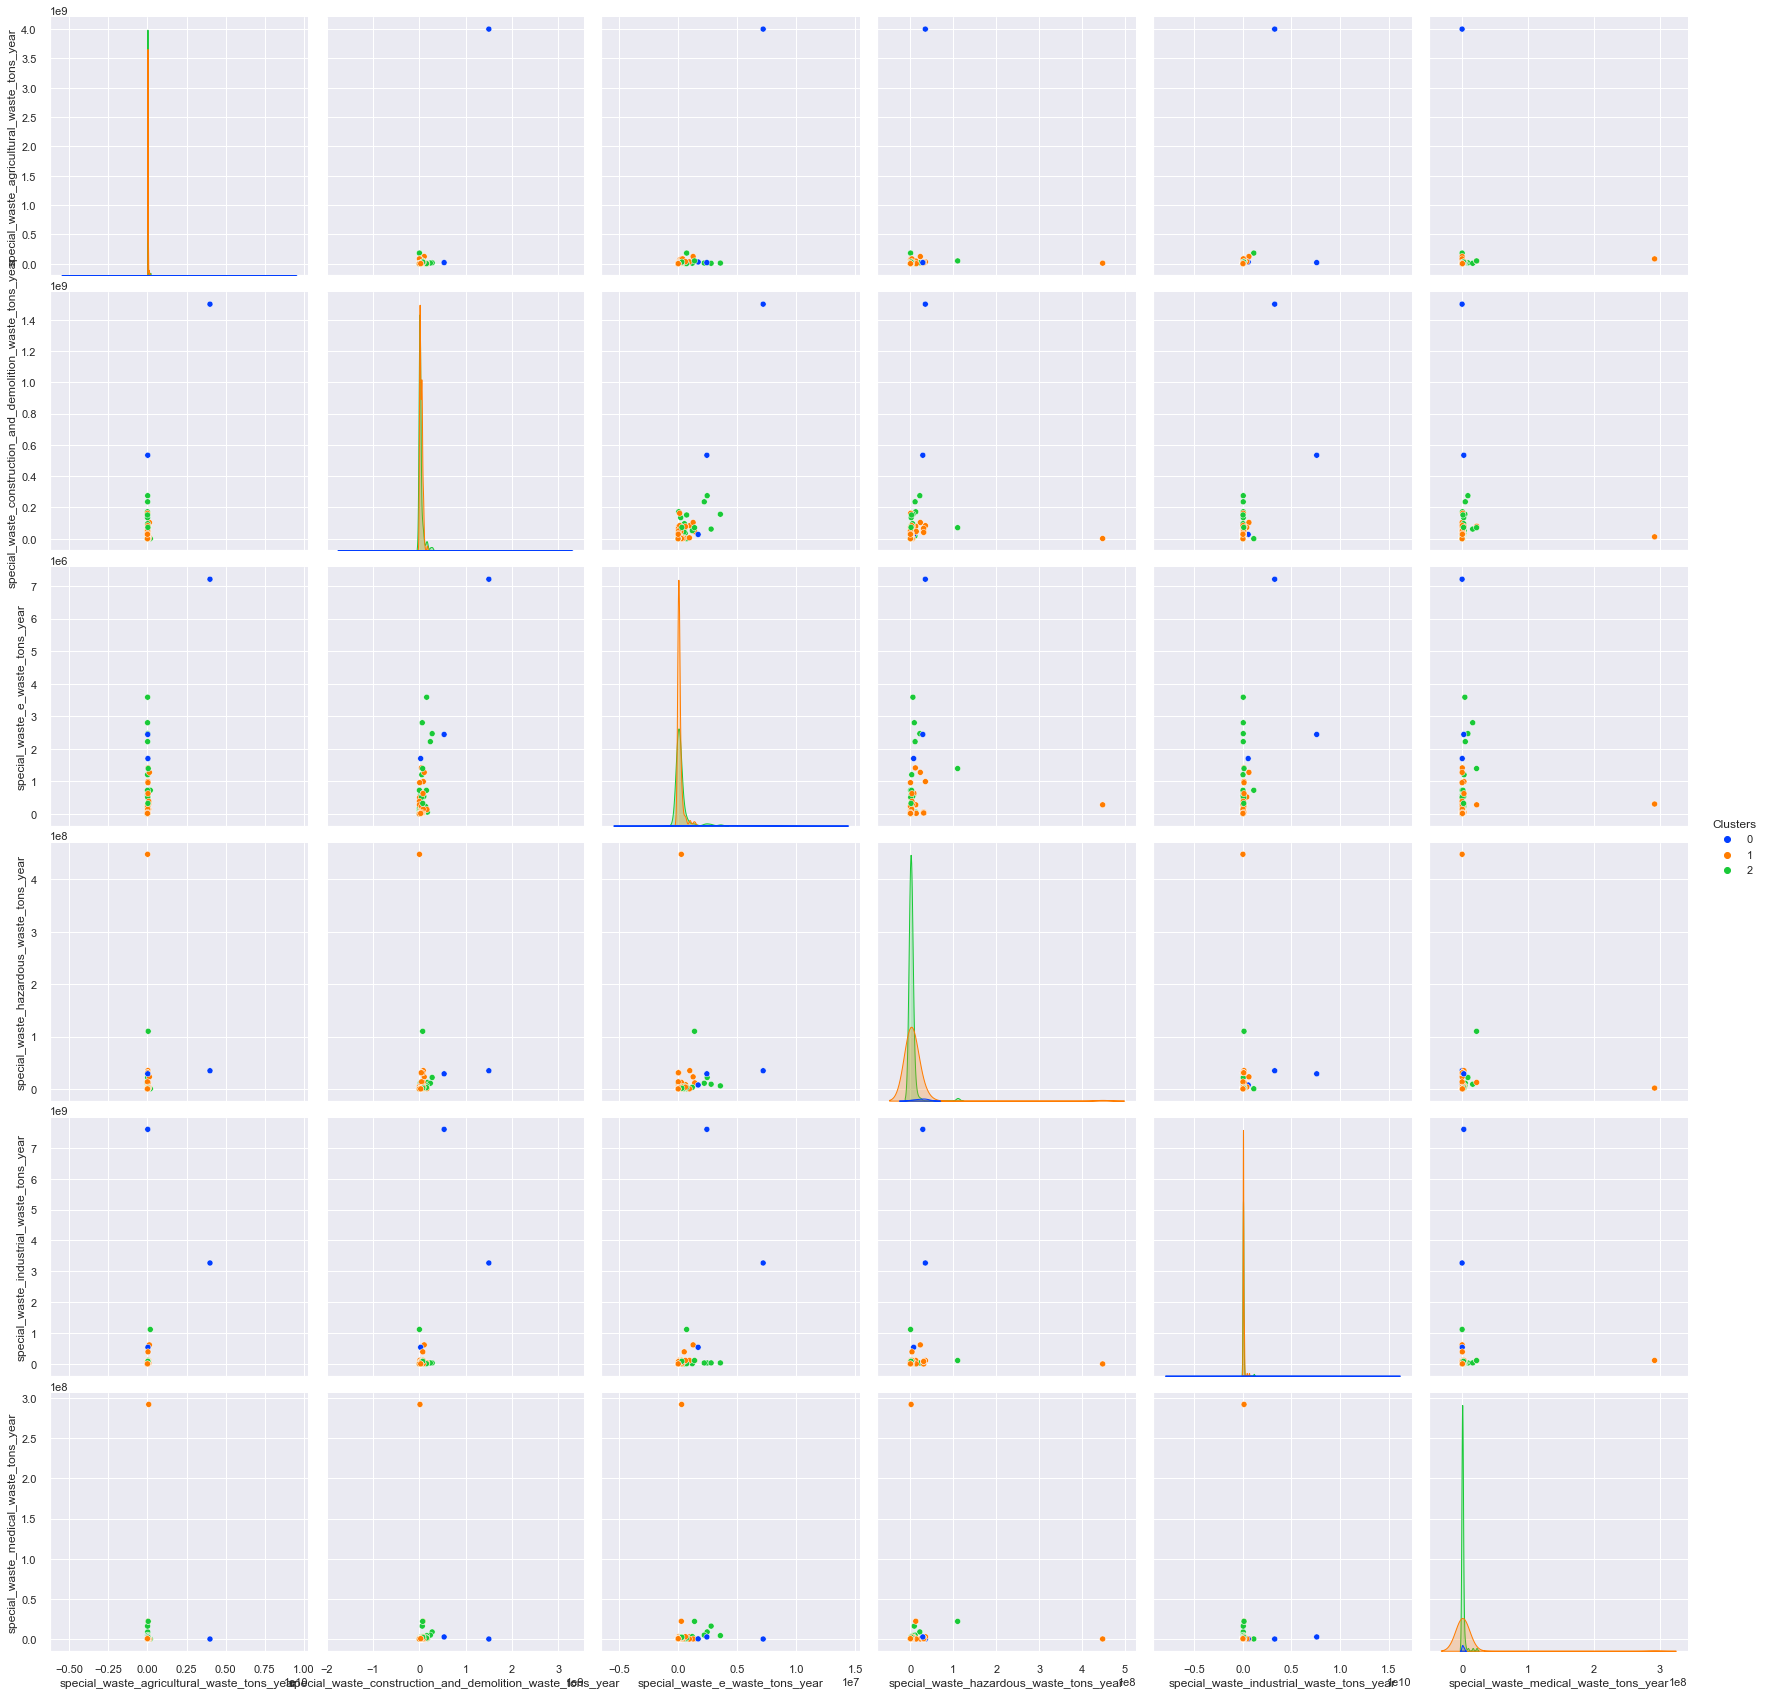

In [76]:
sns.pairplot(df_clusters, hue='Clusters', height=4, vars= special,kind= 'scatter', palette="bright")


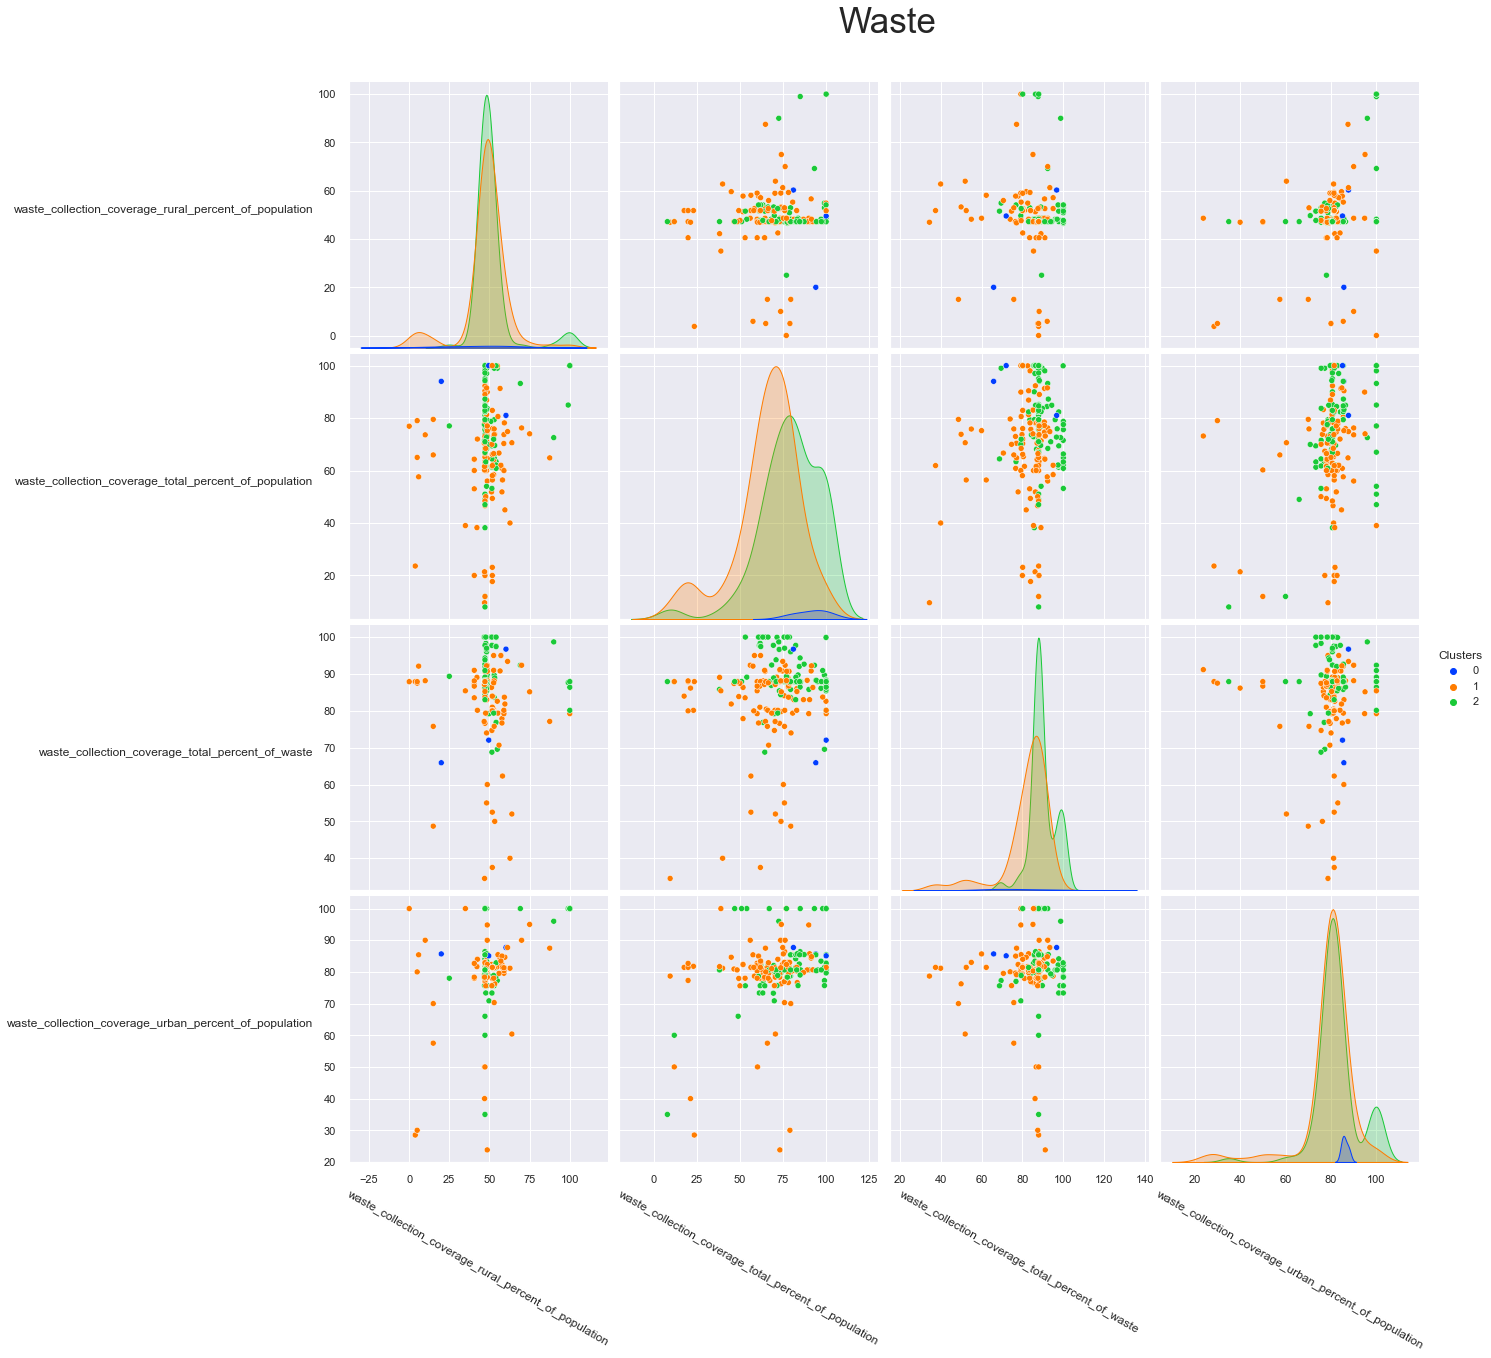

In [77]:
f = sns.pairplot(df_clusters, hue='Clusters', height=4, vars= waste_collection,kind= 'scatter', palette="bright")
for ax in f.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = -30)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
plt.suptitle("Waste", y=1.05,fontsize=35);

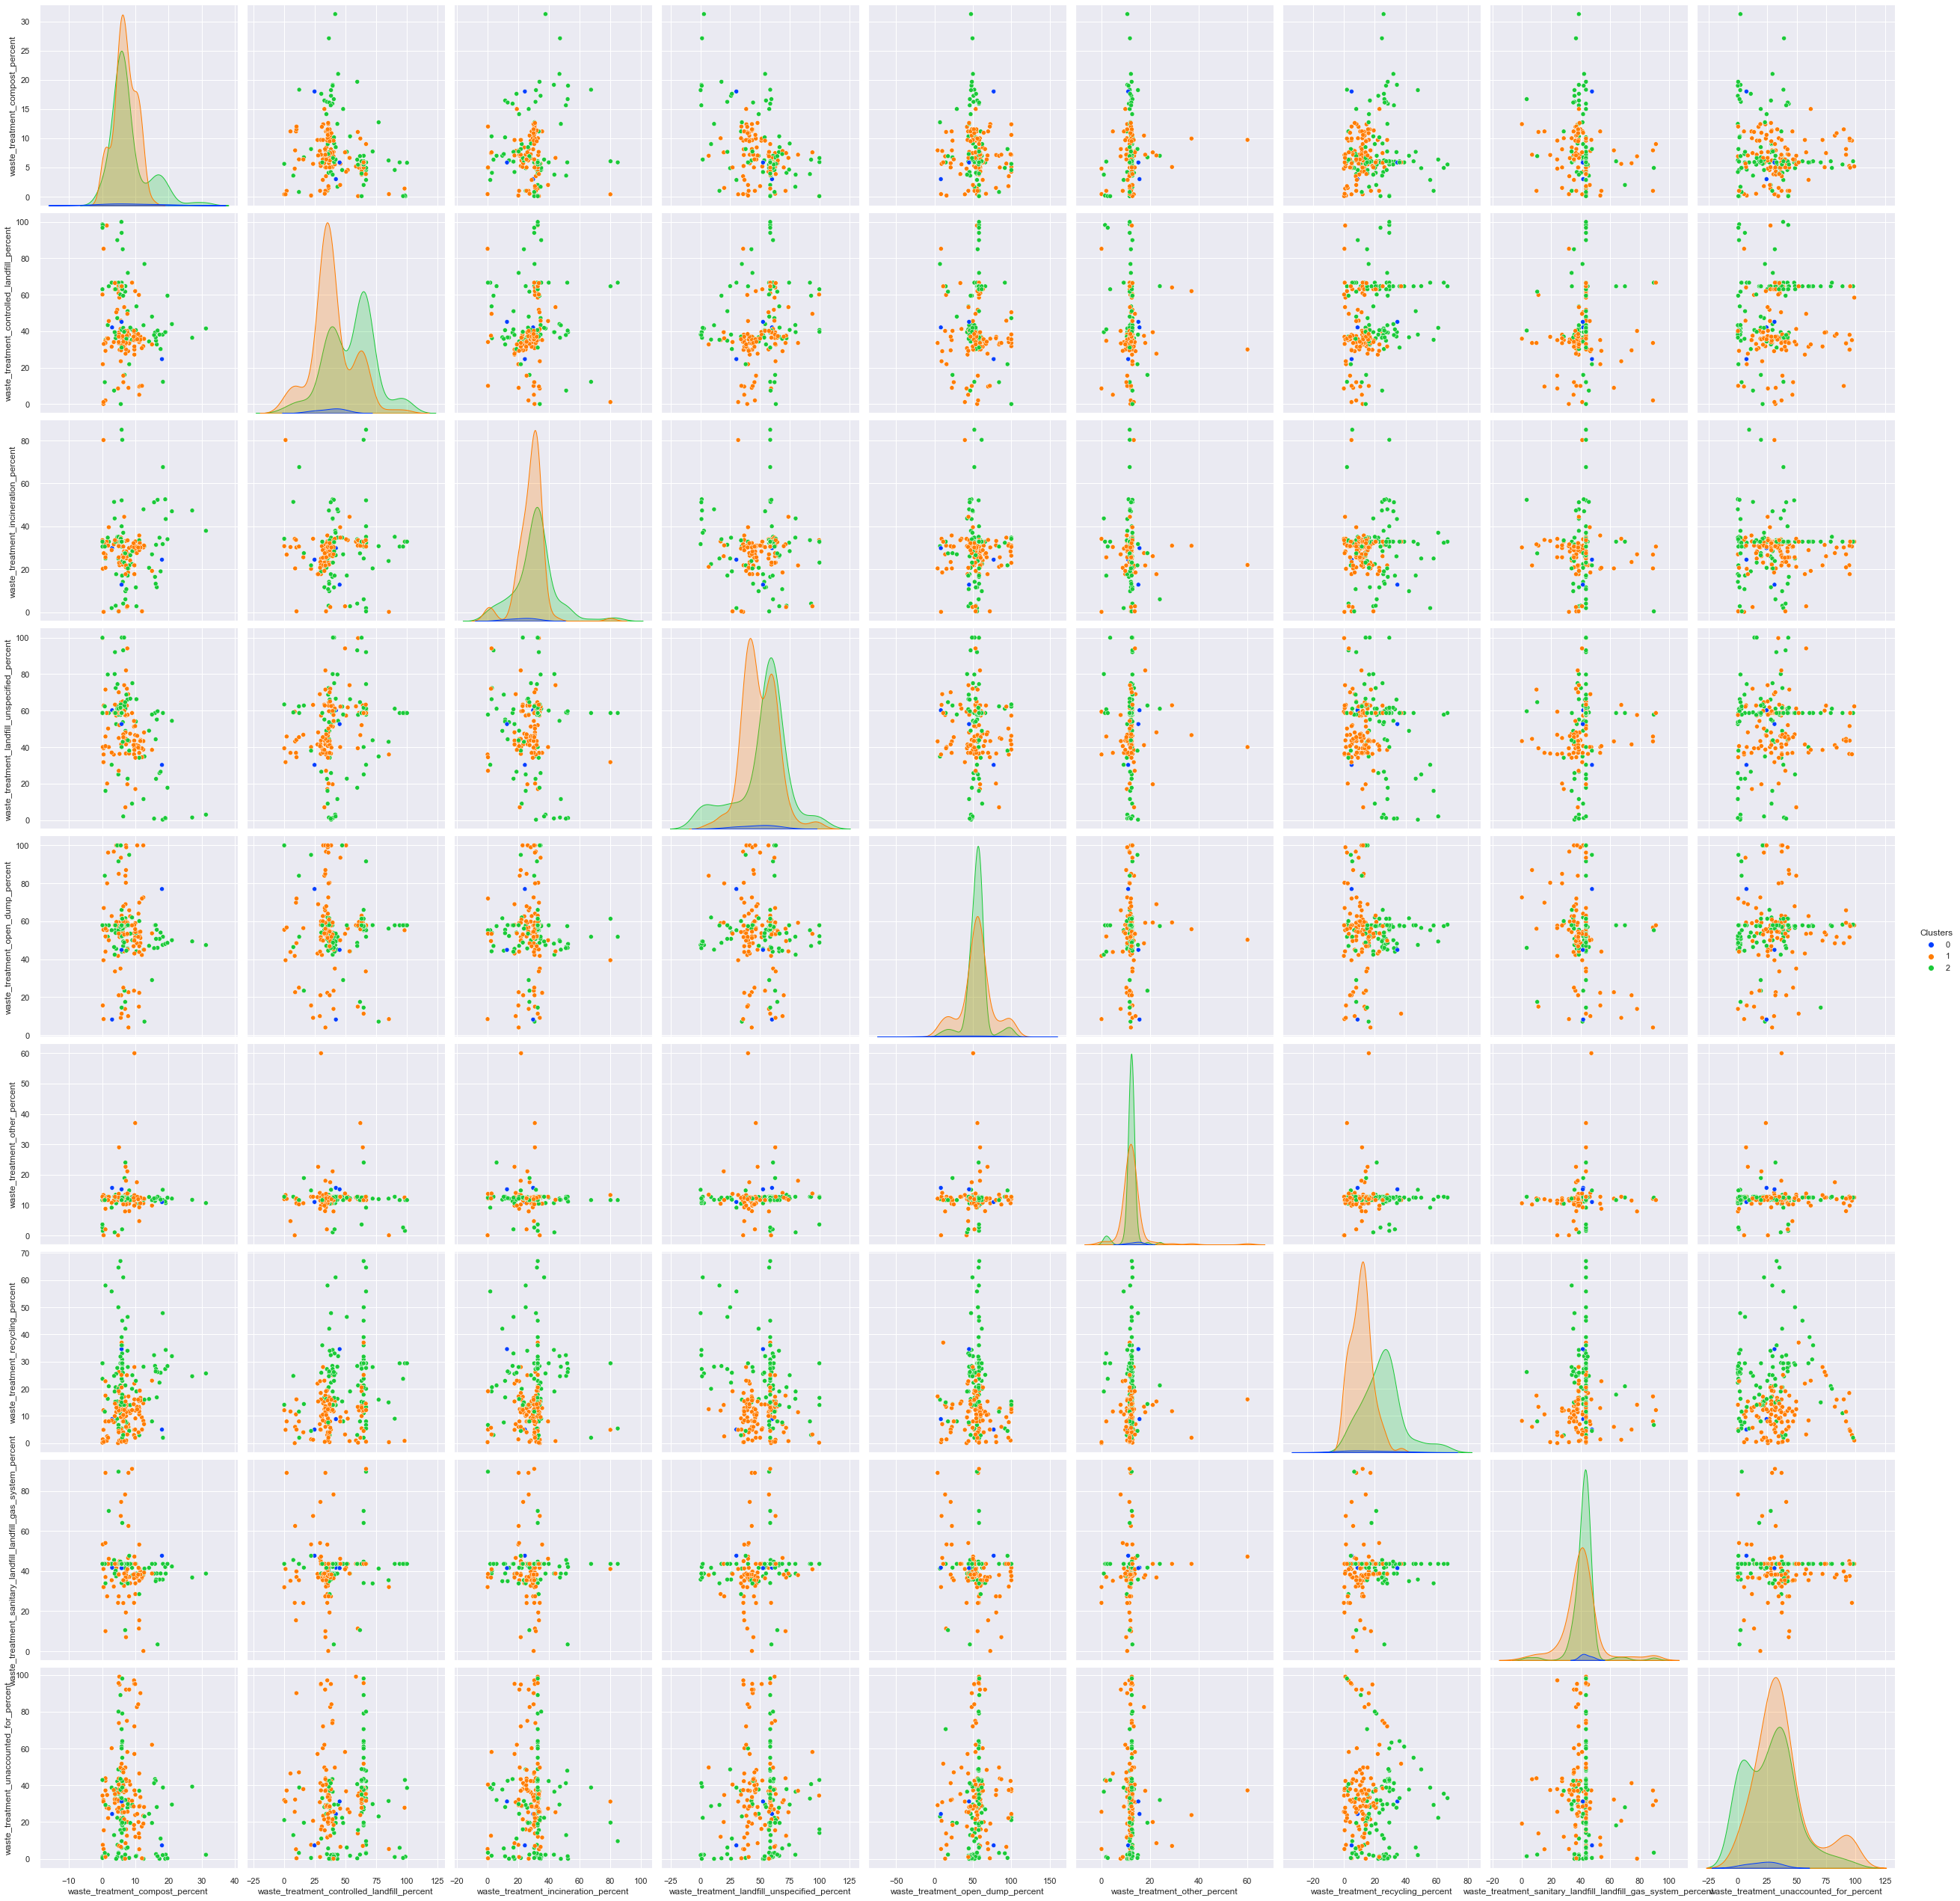

In [78]:
sns.pairplot(df_clusters, hue='Clusters', height=4, vars= waste_treatment,kind= 'scatter', palette="bright")


<Figure size 4000x2720 with 0 Axes>

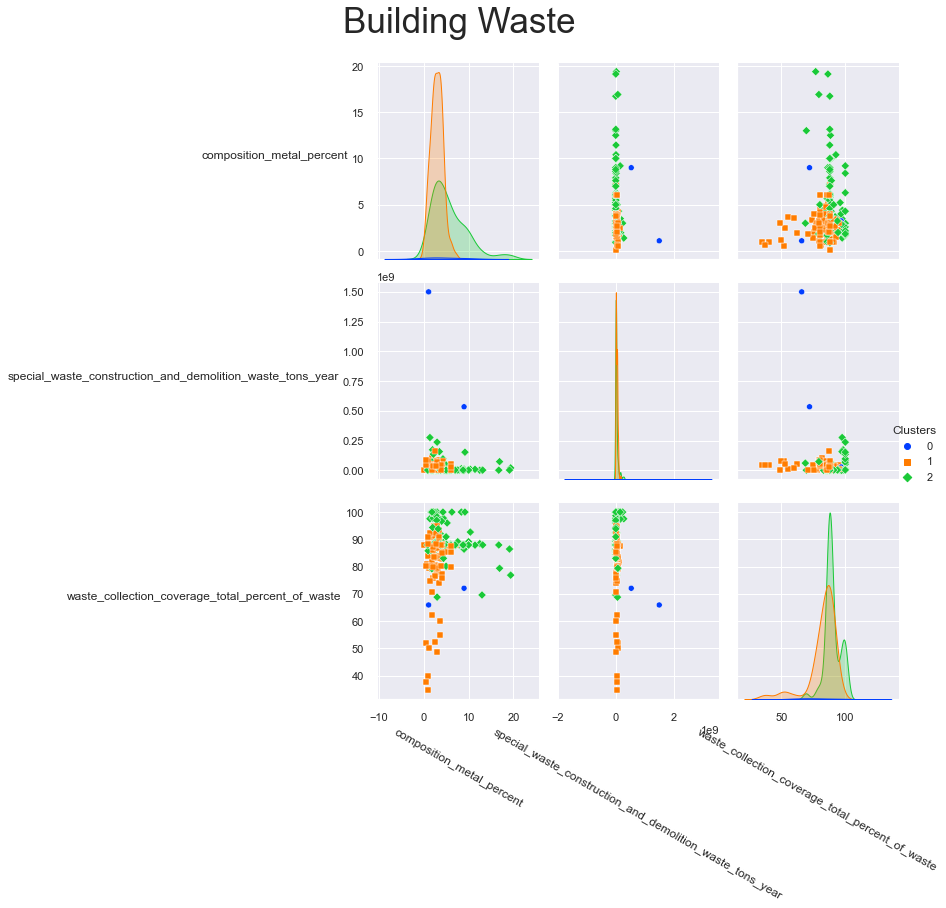

In [79]:
figure(figsize=(50, 34), dpi=80);
g = sns.pairplot(df_clusters, hue='Clusters', height=4, vars= building,kind= 'scatter', palette="bright",markers=["o", "s", "D"])
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = -30)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
plt.tight_layout()
plt.suptitle("Building Waste", y=1.05,fontsize=35);
plt.savefig('Building_Waste.png')

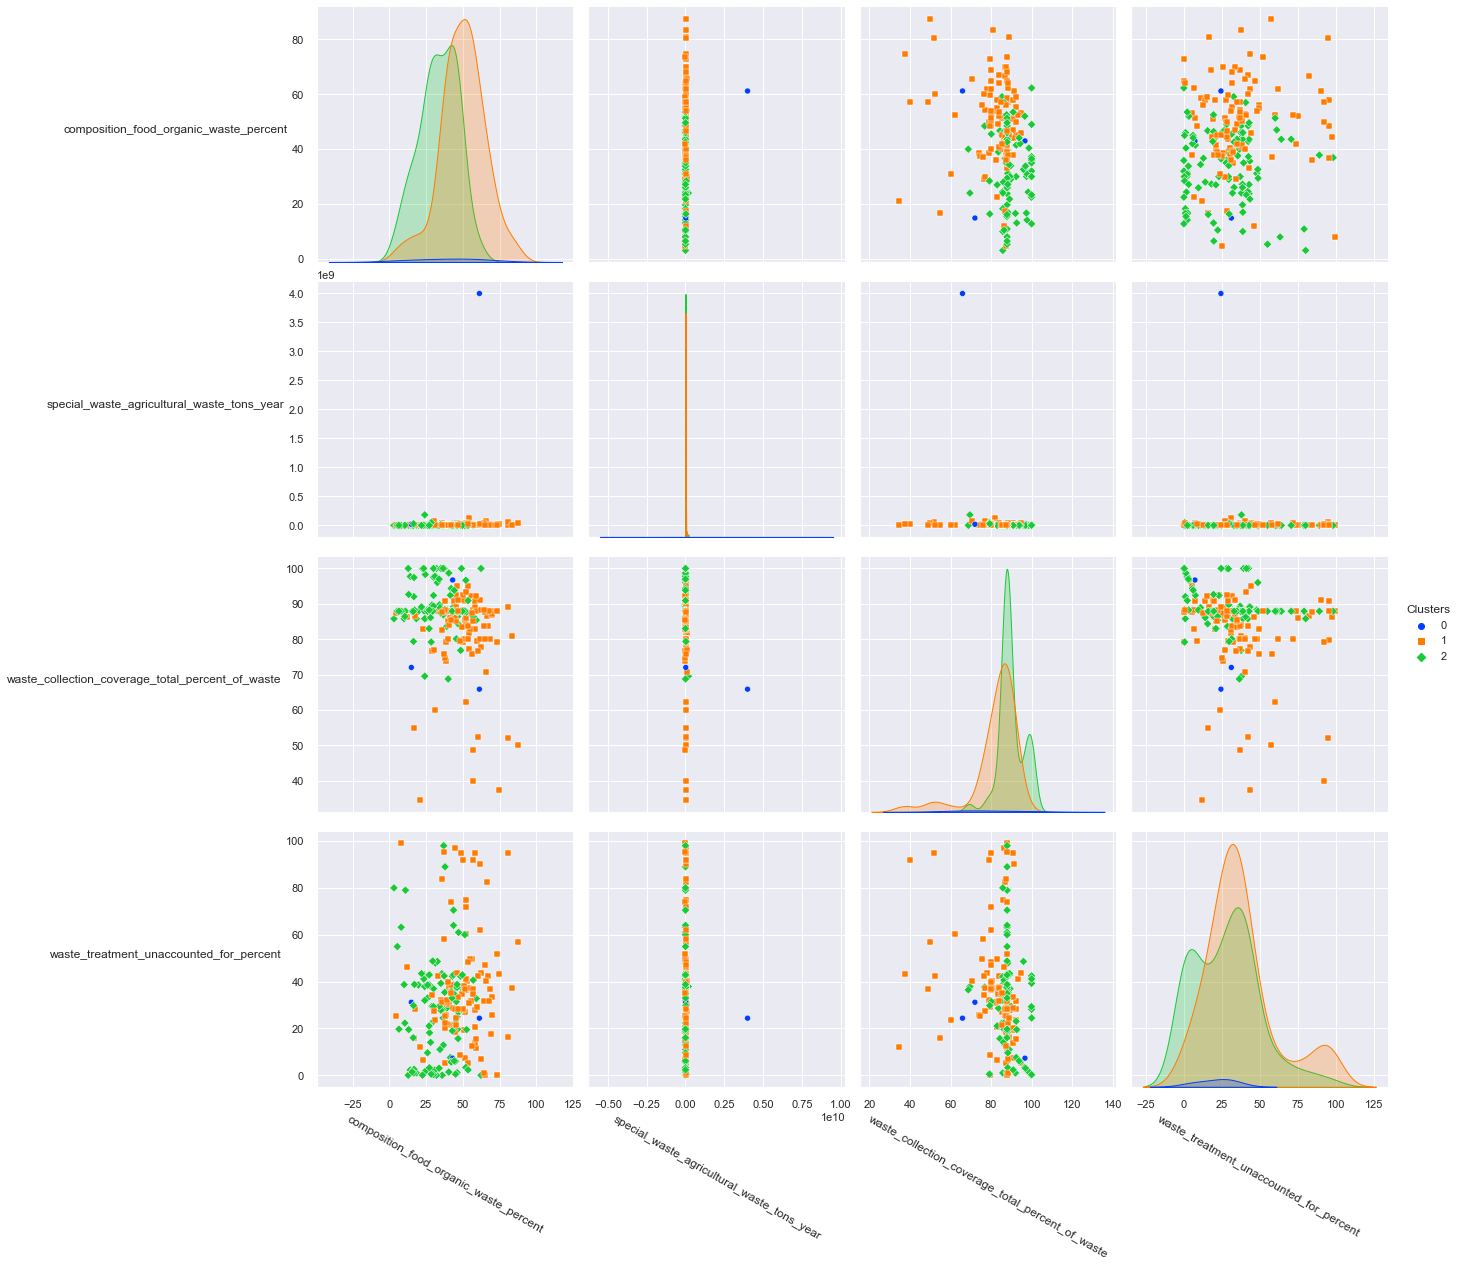

In [80]:
food_plot = sns.pairplot(df_clusters, hue='Clusters', height=4, vars= food,kind= 'scatter', palette="bright",markers=["o", "s", "D"])
for ax in food_plot.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = -30)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')

In [81]:
clusterdummy = pd.get_dummies(df_clusters.Clusters)
df_dummy = pd.concat([df_clusters, clusterdummy], axis = 1).copy()
df_dummy.head()

iso3c region_id country_name income_id  \
0   ABW       LCN        Aruba       HIC   
1   AFG       SAS  Afghanistan       LIC   
2   AGO       SSF       Angola       LMC   
3   ALB       ECS      Albania       UMC   
4   AND       ECS      Andorra       HIC   

  other_information_information_system_for_solid_waste_management  \
0                                        Unspecified                
1                                        Unspecified                
2                                        Unspecified                
3                                                 No                
4                                        Unspecified                

  other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  \
0                                                Yes                              
1                                                Yes                              
2                                        Unspecified                              
3                                                Yes                              
4                                                Yes                              

  other_information_national_law_governing_solid_waste_management_in_the_country  \
0                                                Yes                               
1                                                Yes                               
2                                                Yes                               
3                                                Yes                               
4                                                Yes                               

  other_information_ppp_rules_and_regulations  \
0                                         Yes   
1                                         Yes   
2                                         Yes   
3                                         Yes   
4                                         Yes   

  other_information_summary_of_key_solid_waste_information_made_available_to_the_public  \
0                                                Yes                                      
1                                        Unspecified                                      
2                                        Unspecified                                      
3                                                 No                                      
4                                        Unspecified                                      

  where_where_is_this_data_measured           gdp  \
0                       Unspecified  35563.312500   
1                             Other   2057.062256   
2                       Unspecified   8036.690430   
3               Some disposal sites  13724.058594   
4                       Unspecified  43711.800781   

   composition_food_organic_waste_percent  composition_glass_percent  \
0                               37.833333                   5.813333   
1                               52.782000                   3.429333   
2                               51.800000                   6.700000   
3                               51.400000                   4.500000   
4                               31.200000                   8.200000   

   composition_metal_percent  composition_other_percent  \
0                   5.786667                  15.700000   
1                   2.524000                  11.561333   
2                   4.400000                  11.500000   
3                   4.800000                  15.210000   
4                   2.600000                  11.600000   

   composition_paper_cardboard_percent  composition_plastic_percent  \
0                            16.540000                    12.013333   
1                            14.188667                    11.802667   
2                            11.900000                    13.500000   
3                             9.900000                     9.600000   
4             

In [82]:
df_dummy.rename(columns = {0: 'Cluster_0', 1: 'Cluster_1',2:'Cluster_2'},inplace= True)
df_dummy.columns

Index(['iso3c', 'region_id', 'country_name', 'income_id',
       'other_information_information_system_for_solid_waste_management',
       'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
       'other_information_national_law_governing_solid_waste_management_in_the_country',
       'other_information_ppp_rules_and_regulations',
       'other_information_summary_of_key_solid_waste_information_made_available_to_the_public',
       'where_where_is_this_data_measured', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'population_population_number_of_people',
       'special_waste_agricultural_waste_tons_year',
       'special_waste_construction_and_de

In [83]:
df_dummy.shape

(216, 45)

In [84]:
region_clusters = df_dummy.pivot_table(index = 'region_id',values = ['Cluster_0','Cluster_1', 'Cluster_2'], aggfunc= [np.sum], fill_value=0)

In [85]:
region_clusters

sum                    
          Cluster_0 Cluster_1 Cluster_2
region_id                              
EAS               1        13        22
ECS               0        15        43
LCN               0        21        21
MEA               0        12         9
NAC               1         0         2
SAS               1         6         1
SSF               0        45         3

In [86]:
abr = list(region_clusters.index)

In [87]:
ext = ['East Asia and Pacific','Europe and Central Asia','Latin America and the Caribbean','Middle East and North Africa','Northern America and Central Europe','South Asia','Sub-Saharan Africa']

In [88]:
res = dict(zip(abr, ext))
res

{'EAS': 'East Asia and Pacific',
 'ECS': 'Europe and Central Asia',
 'LCN': 'Latin America and the Caribbean',
 'MEA': 'Middle East and North Africa',
 'NAC': 'Northern America and Central Europe',
 'SAS': 'South Asia',
 'SSF': 'Sub-Saharan Africa'}

In [89]:
region_clusters.rename(index = res, columns = {'region_id':'region'},inplace= True)

In [90]:
region_clusters

sum                    
                                    Cluster_0 Cluster_1 Cluster_2
region_id                                                        
East Asia and Pacific                       1        13        22
Europe and Central Asia                     0        15        43
Latin America and the Caribbean             0        21        21
Middle East and North Africa                0        12         9
Northern America and Central Europe         1         0         2
South Asia                                  1         6         1
Sub-Saharan Africa                          0        45         3

In [91]:
region_clusters.columns

MultiIndex([('sum', 'Cluster_0'),
            ('sum', 'Cluster_1'),
            ('sum', 'Cluster_2')],
           )

<Figure size 4000x2720 with 0 Axes>

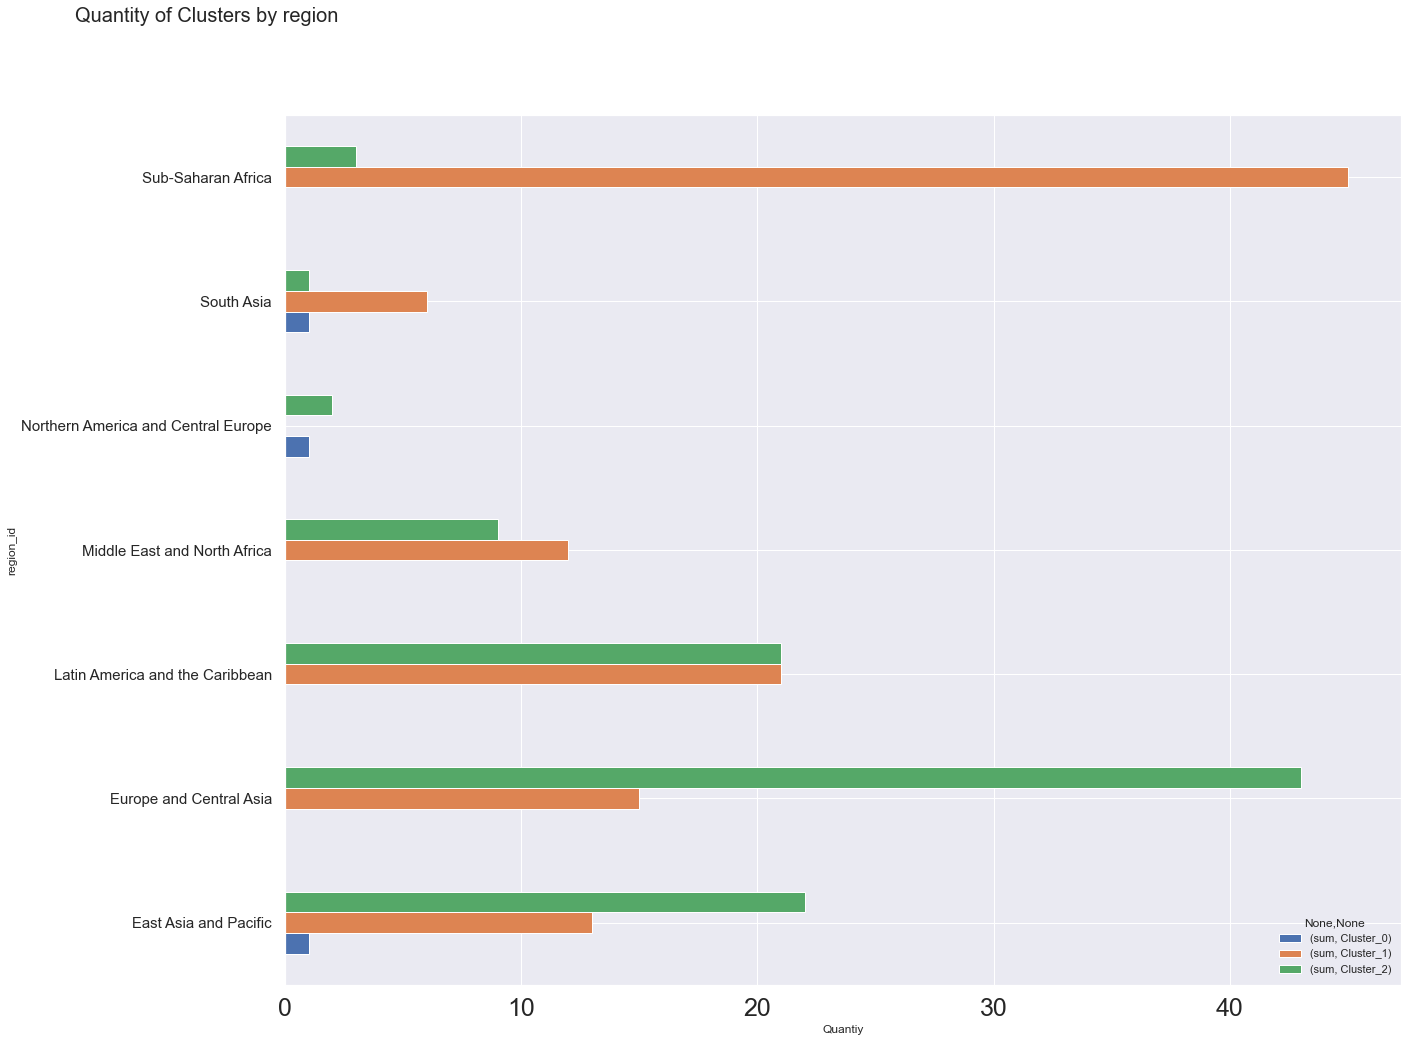

In [104]:
figure(figsize=(50, 34), dpi=80);
region_clusters.plot(kind='barh');
plt.xlabel('Quantiy');
plt.xticks(fontsize=25);
plt.yticks(fontsize=15);
plt.title('Quantity of Clusters by region',fontsize=20,y=1.1,x=-0.07);
plt.savefig('Clusters_by_region.jpg', dpi=300, bbox_inches='tight');

plt.show();


In [93]:
pd.DataFrame(df_dummy.Clusters.value_counts()).reset_index().rename(columns={'index':'Clusters','Clusters':'Quantity'})

Clusters  Quantity
0         1       112
1         2       101
2         0         3

In [95]:
cluster_2 = df_dummy[df_dummy['Cluster_0']>0]
cluster_2[['iso3c','region_id','country_name', 'income_id', 'Clusters']]

iso3c region_id   country_name income_id  Clusters
36    CHN       EAS          China       UMC         0
89    IND       SAS          India       LMC         0
203   USA       NAC  United States       HIC         0

In [106]:
cluster_2

iso3c region_id   country_name income_id  \
36    CHN       EAS          China       UMC   
89    IND       SAS          India       LMC   
203   USA       NAC  United States       HIC   

    other_information_information_system_for_solid_waste_management  \
36                                         Unspecified                
89                                                  No                
203                                                Yes                

    other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  \
36                                                 Yes                              
89                                                 Yes                              
203                                                Yes                              

    other_information_national_law_governing_solid_waste_management_in_the_country  \
36                                                 Yes                               
89                                                 Yes                               
203                                                Yes                               

    other_information_ppp_rules_and_regulations  \
36                                          Yes   
89                                          Yes   
203                                         Yes   

    other_information_summary_of_key_solid_waste_information_made_available_to_the_public  \
36                                         Unspecified                                      
89                                                 Yes                                      
203                                                Yes                                      

    where_where_is_this_data_measured           gdp  \
36                 At Generator level  16092.300781   
89                        Unspecified   6496.807617   
203                       Unspecified  61498.371094   

     composition_food_organic_waste_percent  composition_glass_percent  \
36                                61.200000                   2.100000   
89                                43.001333                   4.729333   
203                               14.900000                   4.400000   

     composition_metal_percent  composition_other_percent  \
36                    1.100000                  13.100000   
89                    3.263333                  13.262667   
203                   9.000000                   3.200000   

     composition_paper_cardboard_percent  composition_plastic_percent  \
36                              9.600000                        9.800   
89                             17.266667                       12.746   
203                            26.600000                       12.900   

     composition_rubber_leather_percent  composition_wood_percent  \
36                                 1.30                  1.800000   
89                                 2.87                  2.773333   
203                                9.50                  6.200000   

     composition_yard_garden_green_waste_percent  \
36                                     10.801846   
89                                     10.113333   
203                                    13.300000   

     population_population_number_of_people  \
36                             1.400050e+09   
89                             1.352617e+09   
203                            3.266875e+08   

     special_waste_agricultural_waste_tons_year  \
36                                 4.000000e+09   
89                                 2.934164e+07   
203                                1.908973e+07   

     special_waste_construction_and_demolition_waste_tons_year  \
36                                        1.500000e+09           
89                                        2.750000e+07           
203                                       5.340000e+08           

     special_waste_e_waste_tons_year  special_waste_hazardous

In [108]:
df_dummy_numeric = df_dummy._get_numeric_data().drop(columns= ['Cluster_0','Cluster_1','Cluster_2'])
df_dummy_numeric.columns

Index(['gdp', 'composition_food_organic_waste_percent',
       'composition_glass_percent', 'composition_metal_percent',
       'composition_other_percent', 'composition_paper_cardboard_percent',
       'composition_plastic_percent', 'composition_rubber_leather_percent',
       'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'population_population_number_of_people',
       'special_waste_agricultural_waste_tons_year',
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_waste_e_waste_tons_year',
       'special_waste_hazardous_waste_tons_year',
       'special_waste_industrial_waste_tons_year',
       'special_waste_medical_waste_tons_year',
       'total_msw_total_msw_generated_tons_year',
       'waste_collection_coverage_rural_percent_of_population',
       'waste_collection_coverage_total_percent_of_population',
       'waste_collection_coverage_total_percent_of_waste',
       'waste_collection_coverage_urban_p

In [110]:
#mean_salary2=df_dummy_numeric.pivot_table(index=["Clusters"], 
#mean_salary2

clusters_behavour = df_dummy_numeric.pivot_table(index=['Clusters'],values=df_dummy_numeric.columns, aggfunc=np.mean)
clusters_behavour

composition_food_organic_waste_percent  composition_glass_percent  \
Clusters                                                                      
0                                      39.700444                   3.743111   
1                                      49.668627                   3.496405   
2                                      33.363125                   6.139474   

          composition_metal_percent  composition_other_percent  \
Clusters                                                         
0                          4.454444                   9.854222   
1                          2.897584                  19.720694   
2                          5.674552                  17.328286   

          composition_paper_cardboard_percent  composition_plastic_percent  \
Clusters                                                                     
0                                   17.822222                    11.815333   
1                                   11.557294                    10.629231   
2                                   18.975573                    12.897064   

          composition_rubber_leather_percent  composition_wood_percent  \
Clusters                                                                 
0                                   4.556667                  3.591111   
1                                   2.298661                  4.562762   
2                                   3.142977                  5.968482   

          composition_yard_garden_green_waste_percent           gdp  \
Clusters                                                              
0                                           11.405060  28029.159831   
1                                           10.357037   8385.403273   
2                                           13.590286  38071.983244   

          population_population_number_of_people  \
Clusters                                           
0                                   1.026452e+09   
1                                   2.899187e+07   
2                                   9.414312e+06   

          special_waste_agricultural_waste_tons_year  \
Clusters                                               
0                                       1.349477e+09   
1                                       9.836465e+06   
2                                       3.939383e+06   

          special_waste_construction_and_demolition_waste_tons_year  \
Clusters                                                              
0                                              6.871667e+08           
1                                              2.910495e+07           
2                                              2.109840e+07           

          special_waste_e_waste_tons_year  \
Clusters                                    
0                            3.783667e+06   
1                            1.137246e+05   
2                            2.126497e+05   

          special_waste_hazardous_waste_tons_year  \
Clusters                                            
0                                    2.363980e+07   
1                                    7.245407e+06   
2                                    2.219962e+06   

          special_waste_industrial_waste_tons_year  \
Clusters                                             
0                                     3.803402e+09   
1                                     2.943770e+07   
2                                     1.930304e+07   

          special_waste_medical_waste_tons_year  \
Clusters                                          
0                                  9.291631e+05   
1                                  3.139472e+06   
2                                  8.448129e+05   

          total_msw_total_msw_generated_tons_year  \
Clusters                                            
0                                    2.833520e+08   
1                                    6.702415e+06   
2                                   

In [120]:
len(list())

32

In [135]:
list_diff = ['composition_food_organic_waste_percent','waste_treatment_landfill_unspecified_percent',
 'waste_treatment_recycling_percent','waste_collection_coverage_total_percent_of_population']

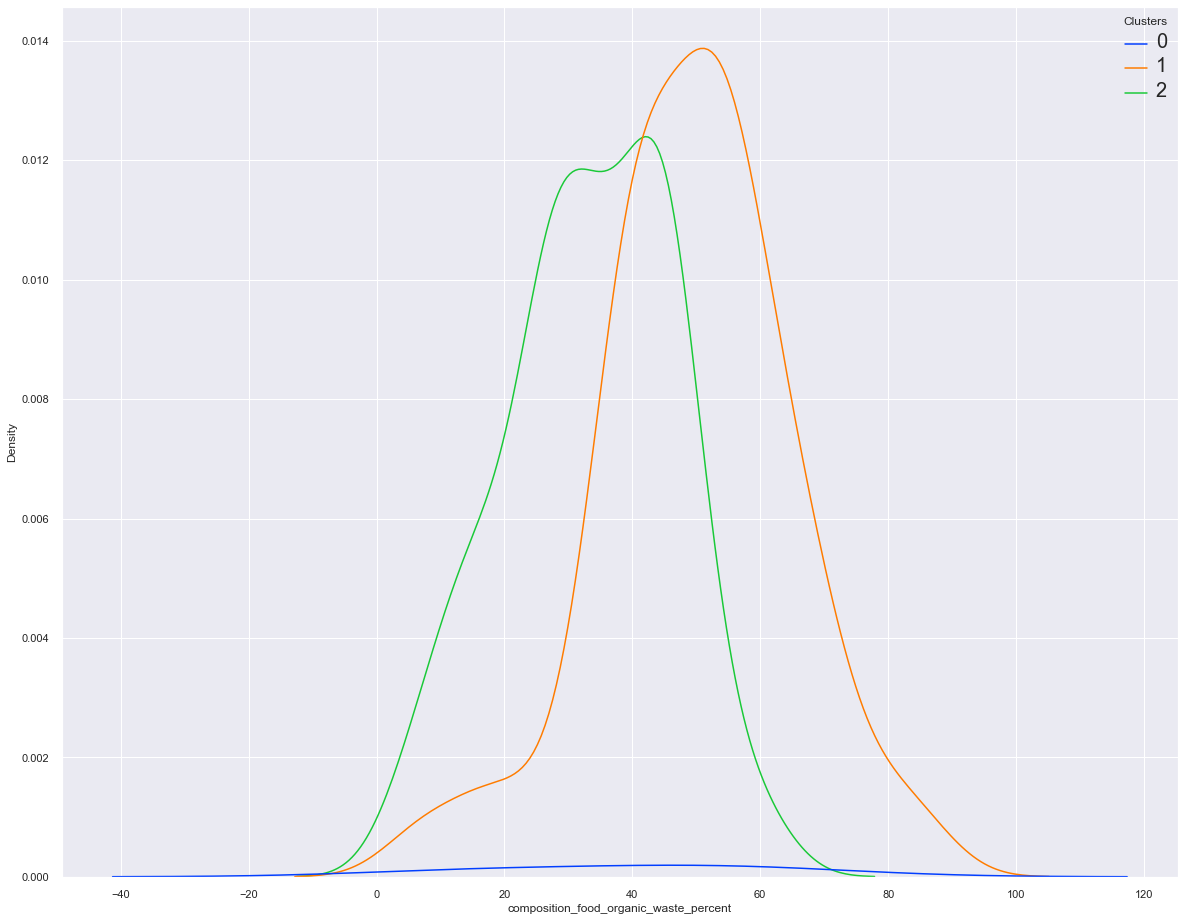

In [147]:
a = sns.kdeplot(data=df_dummy_numeric, x=df_dummy_numeric['composition_food_organic_waste_percent'], hue='Clusters',palette='bright')
plt.setp(a.get_legend().get_texts(), fontsize='20')
plt.savefig('Clusters_food_organis_waste_percent.jpg', dpi=300, bbox_inches='tight');
plt.show()

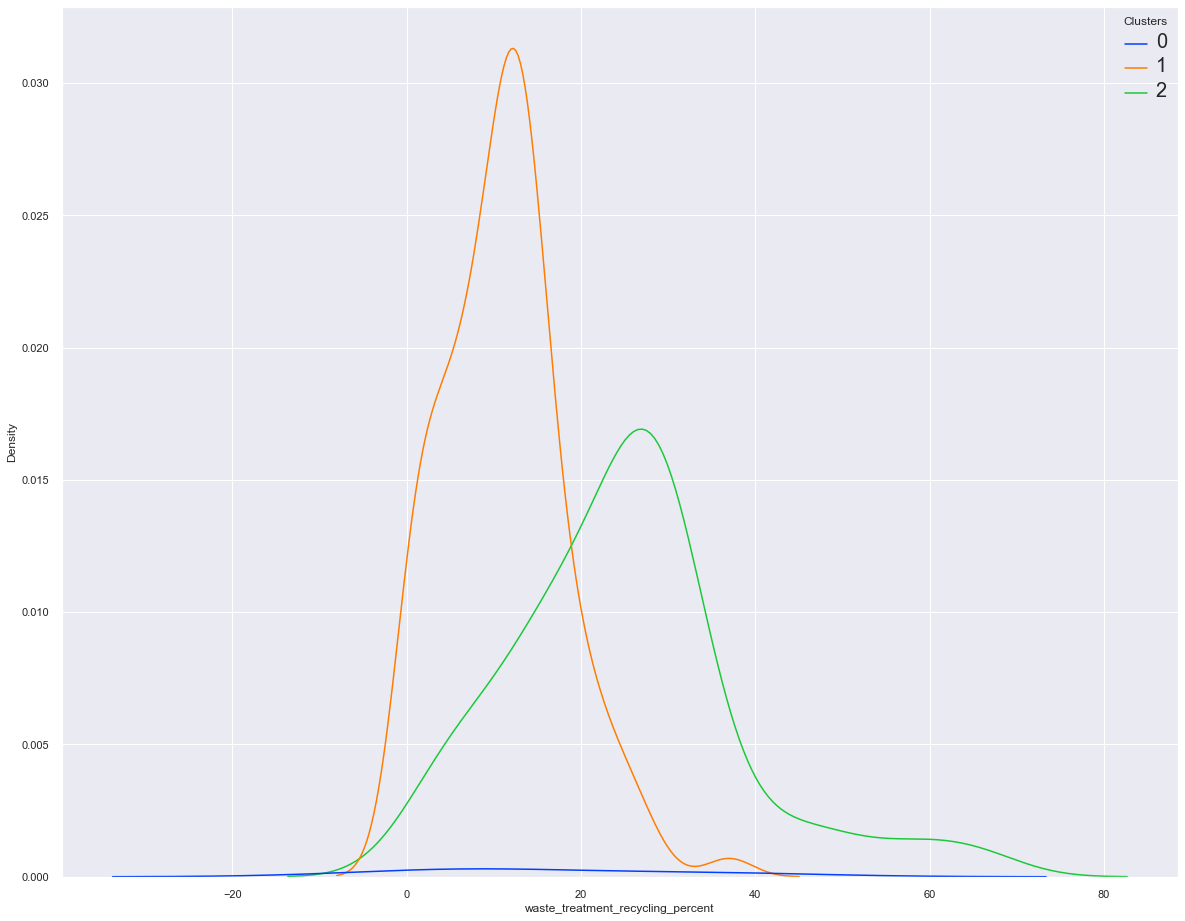

In [146]:
a = sns.kdeplot(data=df_dummy_numeric, x=df_dummy_numeric['waste_treatment_recycling_percent'], hue='Clusters',palette='bright')
plt.setp(a.get_legend().get_texts(), fontsize='20')
plt.savefig('Clusters_treatment_recycling.jpg', dpi=300, bbox_inches='tight');
plt.show()

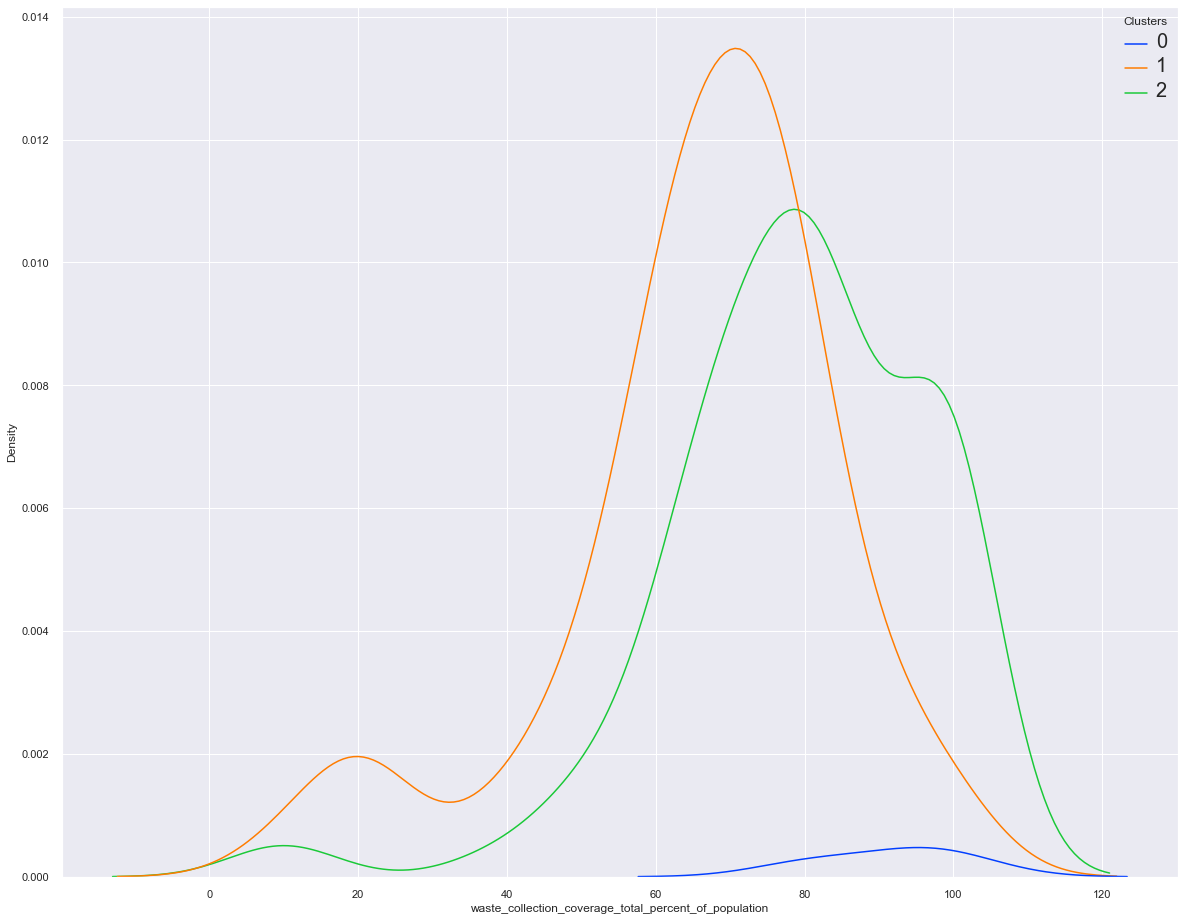

In [148]:
a = sns.kdeplot(data=df_dummy_numeric, x=df_dummy_numeric['waste_collection_coverage_total_percent_of_population'], hue='Clusters',palette='bright')
plt.setp(a.get_legend().get_texts(), fontsize='20')
plt.savefig('Clusters_waste_collection_of_population.jpg', dpi=300, bbox_inches='tight');
plt.show()

In [128]:
composition = ['composition_food_organic_waste_percent',
               'composition_glass_percent',
                 'composition_metal_percent',
                 'composition_other_percent',
                 'composition_paper_cardboard_percent',
                 'composition_plastic_percent',
                 'composition_rubber_leather_percent',
                 'composition_wood_percent',
                 'composition_yard_garden_green_waste_percent',]

special=['special_waste_agricultural_waste_tons_year',
         'special_waste_construction_and_demolition_waste_tons_year',
         'special_waste_e_waste_tons_year',
         'special_waste_hazardous_waste_tons_year',
         'special_waste_industrial_waste_tons_year',
         'special_waste_medical_waste_tons_year']

waste_collection =['waste_collection_coverage_rural_percent_of_population',
                 'waste_collection_coverage_total_percent_of_population',
                 'waste_collection_coverage_total_percent_of_waste',
                 'waste_collection_coverage_urban_percent_of_population']

waste_treatment=['waste_treatment_compost_percent',
                 'waste_treatment_controlled_landfill_percent',
                 'waste_treatment_incineration_percent',
                 'waste_treatment_landfill_unspecified_percent',
                 'waste_treatment_open_dump_percent',
                 'waste_treatment_other_percent',
                 'waste_treatment_recycling_percent',
                 'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
                 'waste_treatment_unaccounted_for_percent']

In [129]:
#df_dummy_numeric.columns

In [139]:
#sns.kdeplot(data=df_dummy_numeric, x=composition, hue='Clusters', palette='bright')